Important function for today:
Label encoding:
```from sklearn.preprocessing import LabelEncoder

    encoder = LabelEncoder()

    dataset_df["Invoice"] = encoder.fit_transform(dataset_df["Invoice"])
    dataset_df["Shipping"] = encoder.fit_transform(dataset_df["Shipping"])

    dataset_df.head()

```
correlation matrix:
```
correlation_mat = dataset_df.corr(numeric_only=True)
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix")
plt.show()
```


boxplot:
```
fig = plt.figure(figsize =(10, 7))
plt.boxplot(dataset_df["Price.Wanted"])
plt.show()
```

train_test_split:
```
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataLogistic, y, test_size=0.2, random_state=42)
y_train.value_counts()
```

stratified test train split:
```
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)
for train_index, test_index in split.split(shuffled_df, shuffled_df["Invoice"]):
    strat_train_set = shuffled_df.loc[train_index]
    strat_test_set = shuffled_df.loc[test_index]
```

Confusion Matrix:
```
#evaluate the model
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)


#visualizing code for confusion matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
```


Logistic Regression:
```
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
```

<h1><font color="Green">Assignment 1 - working on a real dataset </font></h1>
This assignment focuses on trying to determine which row is a shop or a customer. <br>
The project is dealing with a messy unsantized data. <br>
Most of the purpose of this project is hypothesis checking and dataprocessing.<br>
By the time of the project I haven't learning unsupervised learning.

In [221]:
# import important libraries
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
import glob

## part 1 - import the dataset and save it

In [222]:
dataset_path = glob.glob("*.csv")[0]
dataset_path

'yapp-prod_Products_collection_20191128_0552.csv'

In [223]:
# read the file
dataset_df = pd.read_csv(dataset_path)
dataset_df.head()

,@id,Title,TitleSource,Description,Language,Price.Old,Price.Suggested,Price.Wanted,Tags,Images,...,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,Name,DateCreated.DateTime,DateCreated.UnixTime,DateUpdated.DateTime,DateUpdated.UnixTime
0,products-6081,משקפי שמש,אביזרים,חדשות,NaN,0,0,25,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...","[{""DominantColor"":""614233"",""Height"":2016,""Url""...",...,0,0,0,False,False,Accessories,2017-08-27T18:19:35.3402978Z,1503857975,2017-08-27T18:20:05.8107454Z,1503858005
1,products-6129,מפה,סֵמֶל,180X220,NaN,0,0,15,"[{""Confidence"":51.181251525878906,""Id"":""tags-3...","[{""DominantColor"":""BD0F0E"",""Height"":640,""Url"":...",...,0,0,0,False,False,Emblem,2017-08-28T10:47:04.7529867Z,1503917224,2017-08-28T10:47:44.5442782Z,1503917264
2,products-6638,סוללה לאופניים 36,לַיְלָה,מחיר בריצפה. לבוא לקחת עד מחר \r\n,NaN,0,0,150,"[{""Confidence"":53.291530609130859,""Id"":""tags-3...","[{""DominantColor"":""040401"",""Height"":320,""Url"":...",...,6,0,0,False,False,Night,2017-09-13T01:09:40.7816185Z,1505264980,2017-09-17T05:11:24.7711012Z,1505625084
3,products-7397,תיק לנערות.,תיק,לקנות כמות נייד 0543973423 אייל,NaN,0,0,35,"[{""Confidence"":56.021137237548835,""Id"":""tags-3...","[{""DominantColor"":""A57B26"",""Height"":414.0,""Url...",...,14,0,3,True,True,NaN,2017-10-04T14:25:35.1321402Z,1507127135,2017-10-13T13:03:05.9521127Z,1507899785
4,products-6730,שרשרת זהב איטלקי 14 קראט,אביזרים,זהב איטלקי 14 קראט חתום .\r\nיוצר בעבודת יד מי...,NaN,0,0,2800,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...","[{""DominantColor"":""4C3C2C"",""Height"":4608.0,""Ur...",...,31,0,0,False,False,Accessories,2017-09-15T16:17:59.5901541Z,1505492279,2017-10-08T00:20:15.7170202Z,1507422015


# Part 2 - preprocess the data

In [224]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8731 entries, 0 to 8730
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   @id                     8731 non-null   object 
 1   Title                   7399 non-null   object 
 2   TitleSource             2686 non-null   object 
 3   Description             5579 non-null   object 
 4   Language                0 non-null      float64
 5   Price.Old               8731 non-null   int64  
 6   Price.Suggested         8731 non-null   int64  
 7   Price.Wanted            8731 non-null   int64  
 8   Tags                    8731 non-null   object 
 9   Images                  8731 non-null   object 
 10  Status                  8731 non-null   object 
 11  Category.Id             8731 non-null   object 
 12  Category.Name           8731 non-null   object 
 13  CategoryRecognize.Id    8046 non-null   object 
 14  CategoryRecognize.Name  8046 non-null   

We can clearly see that Language column is empty, the name column has 20% of the values and the Title source doesn't have a lot of values as well.<br>
We start with removing the language column

In [225]:
dataset_df = dataset_df.drop(['Language'], axis=1)
dataset_df.head()

,@id,Title,TitleSource,Description,Price.Old,Price.Suggested,Price.Wanted,Tags,Images,Status,...,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,Name,DateCreated.DateTime,DateCreated.UnixTime,DateUpdated.DateTime,DateUpdated.UnixTime
0,products-6081,משקפי שמש,אביזרים,חדשות,0,0,25,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...","[{""DominantColor"":""614233"",""Height"":2016,""Url""...",Cancel,...,0,0,0,False,False,Accessories,2017-08-27T18:19:35.3402978Z,1503857975,2017-08-27T18:20:05.8107454Z,1503858005
1,products-6129,מפה,סֵמֶל,180X220,0,0,15,"[{""Confidence"":51.181251525878906,""Id"":""tags-3...","[{""DominantColor"":""BD0F0E"",""Height"":640,""Url"":...",Cancel,...,0,0,0,False,False,Emblem,2017-08-28T10:47:04.7529867Z,1503917224,2017-08-28T10:47:44.5442782Z,1503917264
2,products-6638,סוללה לאופניים 36,לַיְלָה,מחיר בריצפה. לבוא לקחת עד מחר \r\n,0,0,150,"[{""Confidence"":53.291530609130859,""Id"":""tags-3...","[{""DominantColor"":""040401"",""Height"":320,""Url"":...",Sold,...,6,0,0,False,False,Night,2017-09-13T01:09:40.7816185Z,1505264980,2017-09-17T05:11:24.7711012Z,1505625084
3,products-7397,תיק לנערות.,תיק,לקנות כמות נייד 0543973423 אייל,0,0,35,"[{""Confidence"":56.021137237548835,""Id"":""tags-3...","[{""DominantColor"":""A57B26"",""Height"":414.0,""Url...",Cancel,...,14,0,3,True,True,NaN,2017-10-04T14:25:35.1321402Z,1507127135,2017-10-13T13:03:05.9521127Z,1507899785
4,products-6730,שרשרת זהב איטלקי 14 קראט,אביזרים,זהב איטלקי 14 קראט חתום .\r\nיוצר בעבודת יד מי...,0,0,2800,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...","[{""DominantColor"":""4C3C2C"",""Height"":4608.0,""Ur...",Sold,...,31,0,0,False,False,Accessories,2017-09-15T16:17:59.5901541Z,1505492279,2017-10-08T00:20:15.7170202Z,1507422015


In [226]:
dataset_df.columns.values

array(['@id', 'Title', 'TitleSource', 'Description', 'Price.Old',
       'Price.Suggested', 'Price.Wanted', 'Tags', 'Images', 'Status',
       'Category.Id', 'Category.Name', 'CategoryRecognize.Id',
       'CategoryRecognize.Name', 'Member.Id', 'TotalViews',
       'TotalFavorites', 'TotalShares', 'Shipping', 'Invoice', 'Name',
       'DateCreated.DateTime', 'DateCreated.UnixTime',
       'DateUpdated.DateTime', 'DateUpdated.UnixTime'], dtype=object)

# Hypothesis
1. there is a connection between Invoice and Shipping.
2. the tags and the CategoryRecognize.Id are connected somehow. 
3. total shares, total views and total favorites are connected.
4. DateCreated.datetime and unix are the same but with differenet representtation
5. ids with A in their name are different from the others somehow
6. Status is connected to the price 


In [227]:
# let's explore the shape of the data
dataset_df.shape

(8731, 25)

In [228]:
dataset_df.describe()

,Price.Old,Price.Suggested,Price.Wanted,TotalViews,TotalFavorites,TotalShares,DateCreated.UnixTime,DateUpdated.UnixTime
count,8731.0,8731.0,8.731000e+03,8731.000000,8731.000000,8731.000000,8.731000e+03,8.731000e+03
mean,0.0,0.0,4.058661e+05,83.808728,1.112816,0.329172,1.539191e+09,1.540286e+09
std,0.0,0.0,1.872773e+07,127.780334,2.313957,0.912429,2.248658e+07,2.224079e+07
min,0.0,0.0,-1.000000e+00,0.000000,0.000000,0.000000,1.490041e+09,1.490181e+09
25%,0.0,0.0,2.000000e+01,8.000000,0.000000,0.000000,1.520142e+09,1.521337e+09
50%,0.0,0.0,1.000000e+02,42.000000,0.000000,0.000000,1.543851e+09,1.545088e+09
75%,0.0,0.0,2.500000e+02,108.000000,1.000000,0.000000,1.557932e+09,1.558420e+09
max,0.0,0.0,1.111111e+09,4026.000000,46.000000,17.000000,1.574918e+09,1.574918e+09


We can see we don't have special information the Price.old and Price.suggested columns. <br> 
We would like to check those columns again sperately

In [229]:
dataset_df["Price.Old"].unique()

array([0], dtype=int64)

In [230]:
dataset_df["Price.Suggested"].unique()

array([0], dtype=int64)

In [231]:
dataset_df = dataset_df.drop(["Price.Old", "Price.Suggested"], axis = 1)

In [232]:
dataset_df.shape

(8731, 23)

Now, We would like to plot some histograms of the data.

In [233]:
dataset_df.head()

,@id,Title,TitleSource,Description,Price.Wanted,Tags,Images,Status,Category.Id,Category.Name,...,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,Name,DateCreated.DateTime,DateCreated.UnixTime,DateUpdated.DateTime,DateUpdated.UnixTime
0,products-6081,משקפי שמש,אביזרים,חדשות,25,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...","[{""DominantColor"":""614233"",""Height"":2016,""Url""...",Cancel,categories-2,אופנה ואביזרים,...,0,0,0,False,False,Accessories,2017-08-27T18:19:35.3402978Z,1503857975,2017-08-27T18:20:05.8107454Z,1503858005
1,products-6129,מפה,סֵמֶל,180X220,15,"[{""Confidence"":51.181251525878906,""Id"":""tags-3...","[{""DominantColor"":""BD0F0E"",""Height"":640,""Url"":...",Cancel,categories-2,אופנה ואביזרים,...,0,0,0,False,False,Emblem,2017-08-28T10:47:04.7529867Z,1503917224,2017-08-28T10:47:44.5442782Z,1503917264
2,products-6638,סוללה לאופניים 36,לַיְלָה,מחיר בריצפה. לבוא לקחת עד מחר \r\n,150,"[{""Confidence"":53.291530609130859,""Id"":""tags-3...","[{""DominantColor"":""040401"",""Height"":320,""Url"":...",Sold,categories-2,אופנה ואביזרים,...,6,0,0,False,False,Night,2017-09-13T01:09:40.7816185Z,1505264980,2017-09-17T05:11:24.7711012Z,1505625084
3,products-7397,תיק לנערות.,תיק,לקנות כמות נייד 0543973423 אייל,35,"[{""Confidence"":56.021137237548835,""Id"":""tags-3...","[{""DominantColor"":""A57B26"",""Height"":414.0,""Url...",Cancel,categories-2,אופנה ואביזרים,...,14,0,3,True,True,NaN,2017-10-04T14:25:35.1321402Z,1507127135,2017-10-13T13:03:05.9521127Z,1507899785
4,products-6730,שרשרת זהב איטלקי 14 קראט,אביזרים,זהב איטלקי 14 קראט חתום .\r\nיוצר בעבודת יד מי...,2800,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...","[{""DominantColor"":""4C3C2C"",""Height"":4608.0,""Ur...",Sold,categories-2,אופנה ואביזרים,...,31,0,0,False,False,Accessories,2017-09-15T16:17:59.5901541Z,1505492279,2017-10-08T00:20:15.7170202Z,1507422015


array([[<Axes: title={'center': 'Price.Wanted'}>,
        <Axes: title={'center': 'TotalViews'}>],
       [<Axes: title={'center': 'TotalFavorites'}>,
        <Axes: title={'center': 'TotalShares'}>],
       [<Axes: title={'center': 'DateCreated.UnixTime'}>,
        <Axes: title={'center': 'DateUpdated.UnixTime'}>]], dtype=object)

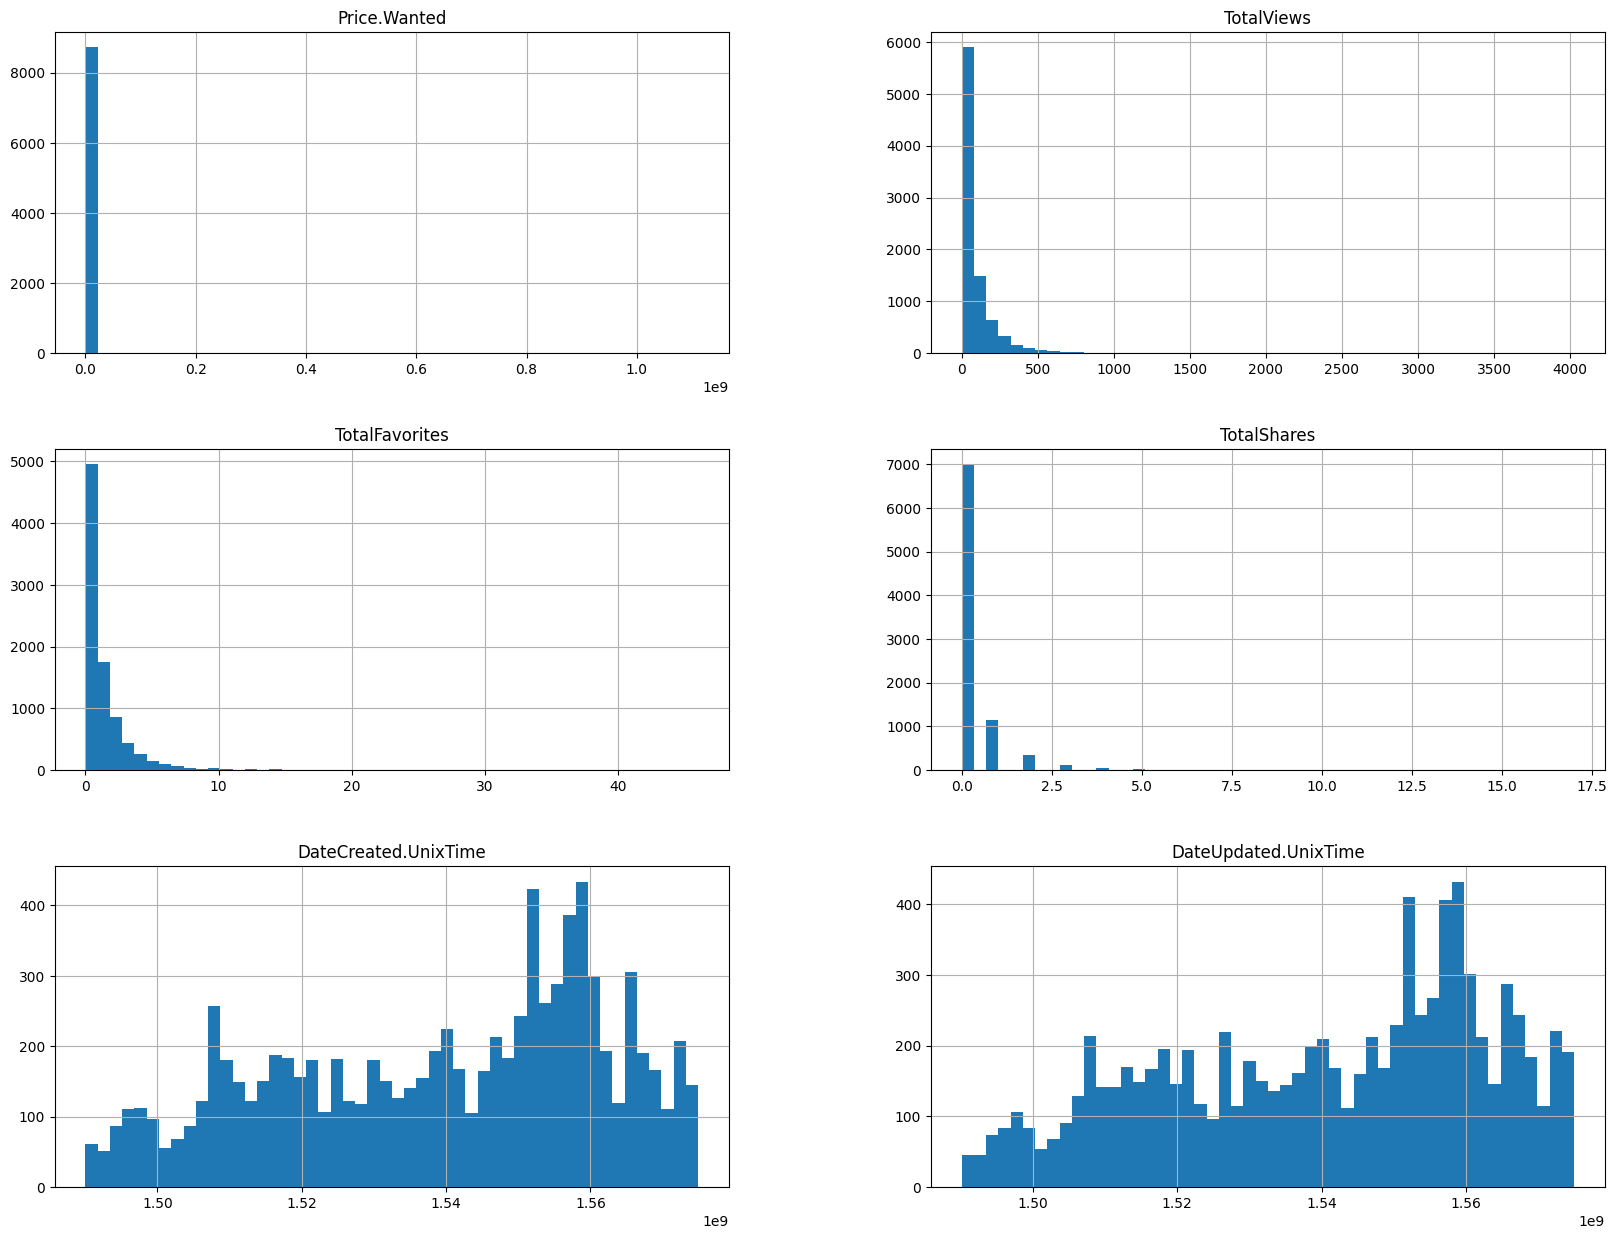

In [234]:
dataset_df.hist(bins=50, figsize=(20,15))

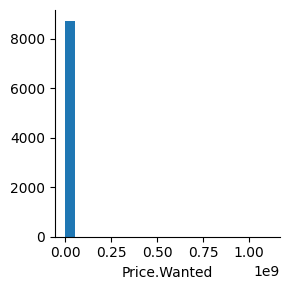

In [235]:
# we can see the histogram of Price.wanted is weird. Let's find out why.
grid=sns.FacetGrid(dataset_df)

grid.map(plt.hist, 'Price.Wanted',bins=20)

The histogram is strange because of the jumps in the axis.<br>
We will try exploring this column

In [236]:
dataset_df["Price.Wanted"].describe()

count    8.731000e+03
mean     4.058661e+05
std      1.872773e+07
min     -1.000000e+00
25%      2.000000e+01
50%      1.000000e+02
75%      2.500000e+02
max      1.111111e+09
Name: Price.Wanted, dtype: float64

In [237]:
dataset_df["Price.Wanted"].min()

-1

The minimum price in the dataset is -1 so can conclude that we can clear some data

In [238]:
priceLowerThan0 = dataset_df.loc[dataset_df['Price.Wanted'] <= 0]
priceLowerThan0

,@id,Title,TitleSource,Description,Price.Wanted,Tags,Images,Status,Category.Id,Category.Name,...,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,Name,DateCreated.DateTime,DateCreated.UnixTime,DateUpdated.DateTime,DateUpdated.UnixTime
37,products-6970,שעון רולקס סופר קופי נגד מים במחיר מבצע!,NaN,NaN,0,[],"[{""DominantColor"":null,""Height"":4160,""Url"":""ht...",Cancel,categories-2,אופנה ואביזרים,...,2,0,0,False,False,NaN,2017-09-21T17:17:32.8929696Z,1506014252,2017-09-22T09:35:25.4698958Z,1506072925
38,products-6969,NaN,NaN,NaN,0,[],"[{""DominantColor"":null,""Height"":3120,""Url"":""ht...",Cancel,categories-2,אופנה ואביזרים,...,4,0,0,False,False,NaN,2017-09-21T17:15:45.9898770Z,1506014145,2017-09-22T09:35:35.6337187Z,1506072935
41,products-6020,yo yo yo,תָג,NaN,0,"[{""Confidence"":54.963249206542969,""Id"":""tags-3...","[{""DominantColor"":""9C2F5A"",""Height"":1440,""Url""...",Cancel,categories-2,אופנה ואביזרים,...,1,0,0,False,False,NaN,2017-08-27T12:34:17.3881954Z,1503837257,2017-10-02T11:21:58.0105151Z,1506943318
42,products-7592,اممممممم,מתנה,اممممممماها,0,"[{""Confidence"":55.875049591064453,""Id"":""tags-1...","[{""DominantColor"":""2F0F68"",""Height"":1632,""Url""...",Cancel,categories-2,אופנה ואביזרים,...,0,0,0,True,False,Gift,2017-10-08T20:58:44.4663698Z,1507496324,2017-10-09T07:10:44.5760585Z,1507533044
56,products-4585,מחוץ לבית,מחוץ לבית,NaN,0,"[{""Confidence"":71.136054992675781,""Id"":""tags-1...","[{""DominantColor"":""247EA7"",""Height"":2880,""Url""...",Cancel,categories-2,אופנה ואביזרים,...,0,0,0,True,False,Outdoors,2017-07-12T20:42:28.7673713Z,1499892148,2017-07-12T20:44:27.7612619Z,1499892267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8704,products-15242,כחול אדידס קירין zip-up בודי מעיל,כחול אדידס קירין zip-up בודי מעיל,NaN,0,"[{""Id"":""tags-1573"",""Name"":""human"",""Text"":""בן א...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",Cancel,categories-2,אופנה,...,1,0,0,False,False,blue Adidas Kirin zip-up bubble hoodie jacket,2018-03-15T10:00:48.7195780Z,1521108048,2018-03-15T10:01:05.9990998Z,1521108065
8705,products-32545-A,NaN,NaN,NaN,-1,"[{""Id"":null,""Name"":""accessory"",""Text"":""אבזר"",""...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",Available,categories-2,אופנה,...,162,1,0,False,False,NaN,2019-02-15T16:40:25.3064906Z,1550248825,2019-02-15T16:40:28.9975666Z,1550248828
8716,products-47907-A,NaN,NaN,NaN,0,"[{""Id"":null,""Name"":""clothing"",""Text"":""בגדים"",""...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",Available,categories-2,אופנה,...,36,0,0,False,False,NaN,2019-11-25T22:13:13.7671397Z,1574719993,2019-11-26T21:55:07.2134715Z,1574805307
8724,products-42120-A,משתמש בלאק רנדום לא פעיל בכלל מסיזן 3 ואל תשכח...,NaN,מעדיף לראשון שקונה,-1,"[{""Id"":null,""Name"":""person"",""Text"":""אדם"",""Lang...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",Available,categories-2,אופנה,...,29,0,0,True,False,NaN,2019-07-13T10:10:44.1379988Z,1563012644,2019-07-13T10:10:44.1379988Z,1563012644


we can see that we have 1935 products with price lower or equal to 0. <br>
Maybe, it's because the product owner wants to negotiate about the price and they will pay in cash. <br>
let's check that
<br><br>
from viewing the data briely we can see that Invoice is mostly False and we would check the name, description and status categories.

**Note🔑:** we would like to check the categorial variables before checking the price data 

In [239]:
dataset_df.describe(include='O')

,@id,Title,TitleSource,Description,Tags,Images,Status,Category.Id,Category.Name,CategoryRecognize.Id,CategoryRecognize.Name,Member.Id,Name,DateCreated.DateTime,DateUpdated.DateTime
count,8731,7399,2686,5579,8731,8731,8731,8731,8731,8046,8046,8731,1581,8731,8731
unique,8731,6458,661,5073,7759,8728,4,1,2,8,13,2860,297,8730,8718
top,products-6081,הַנעָלָה,הַלבָּשָׁה,חדש,[],"[{""DominantColor"":null,""Height"":100.0,""Url"":""h...",Available,categories-2,אופנה,categories-2,אופנה,members-56954-A,Clothing,2018-02-03T14:44:36.3293170Z,2018-09-11T00:02:37.0810617Z
freq,1,37,241,97,379,3,4544,8731,7558,7625,7116,133,172,2,3


we can see the we have only 1 string in the category.Id so we can get rid of it. <br>
We can also see the the Name columns is a bit strange, let's explore that as well. 

In [240]:
dataset_df = dataset_df.drop(["Category.Id"], axis = 1)

In [241]:
dataset_df["Name"].unique()

array(['Accessories', 'Emblem', 'Night', nan, 'Wristwatch', 'Footwear',
       'Jewelry', 'Coil', 'Boot', 'Clothing', 'Blouse', 'Costume', 'Fire',
       'People', 'Gold', 'black Adidas soccer jersey', 'Gift', 'Outdoors',
       'Shorts', 'Aerial View', 'Astronomy', 'a close up of a curtain',
       'Badge', 'Evening Dress', 'Paper', 'Apron', 'Hardwood',
       'Electronics', 'Luggage', 'Wallet', 'Human', 'Apparel', 'Pot',
       'Corset', 'Beverage', 'Digital Watch', 'Bling', 'Plant', 'Bag',
       'Glasses', 'Light', 'Water', 'Linen', 'Cushion', 'Box', 'Bracelet',
       'Backpack', 'Appliance', 'Tripod', 'Bottle', 'Camera', 'Blanket',
       'Corridor', 'Animal', 'running shoe', 'Anklet', 'Glass', 'Loafer',
       'Text', 'Flora', 'Cosmetics', 'holster', 'spatula', 'Running Shoe',
       'notebook', 'Home Decor', 'Cell Phone', 'a crowd of people',
       'a pair of shoes', 'a close up of a bird', 'clog', 'wallet',
       'apron', 'swing', 'water jug', 'sunglasses', 'fountain', 'quil

**Hypothesis:** The Name and the TitleSource are connected

In [242]:
dataset_df[["Name","TitleSource"]]

,Name,TitleSource
0,Accessories,אביזרים
1,Emblem,סֵמֶל
2,Night,לַיְלָה
3,NaN,תיק
4,Accessories,אביזרים
...,...,...
8726,NaN,NaN
8727,NaN,NaN
8728,NaN,NaN
8729,NaN,NaN


In [243]:
dataset_df.Name.value_counts()

Name
Clothing                                         172
Wristwatch                                       163
Human                                            134
Footwear                                         103
People                                           102
                                                ... 
Menu                                               1
black and gray Logitech wireless mouse             1
white jeans                                        1
gray Logitech wireless mouse                       1
blue Adidas Kirin zip-up bubble hoodie jacket      1
Name: count, Length: 297, dtype: int64

We can see that we have a lot of Clothing and wristwatch
<br> What is Human? let's check that

In [244]:
dataset_df.loc[dataset_df.Name == "Human"]

,@id,Title,TitleSource,Description,Price.Wanted,Tags,Images,Status,Category.Name,CategoryRecognize.Id,...,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,Name,DateCreated.DateTime,DateCreated.UnixTime,DateUpdated.DateTime,DateUpdated.UnixTime
103,products-5382,בן אנוש,בן אנוש,NaN,150,"[{""Confidence"":99.093208312988281,""Id"":""tags-1...","[{""DominantColor"":""0BC032"",""Height"":720.0,""Url...",Cancel,אופנה ואביזרים,NaN,...,3,0,0,False,False,Human,2017-08-07T12:33:13.0157163Z,1502109193,2017-08-07T12:33:29.9814167Z,1502109209
108,products-10055,טטט,בן אנוש,מממממ,22,"[{""Confidence"":99.093208312988281,""Id"":""tags-1...","[{""DominantColor"":""90593B"",""Height"":2016.0,""Ur...",Cancel,אופנה,categories-2,...,0,0,0,False,False,Human,2017-12-02T05:26:48.8120346Z,1512192408,2017-12-02T05:27:08.2434583Z,1512192428
162,products-7127,Title Title,בן אנוש,Tellsomethingaboutyourproduct \r\nTellsomethin...,0,"[{""Confidence"":99.093208312988281,""Id"":""tags-1...","[{""DominantColor"":""A68025"",""Height"":1200.0,""Ur...",Cancel,אופנה ואביזרים,categories-2,...,0,0,0,True,False,Human,2017-09-25T13:39:58.9836637Z,1506346798,2017-09-25T14:10:43.3419874Z,1506348643
251,products-10835,חחחח,בן אנוש,עעע,55,"[{""Confidence"":99.093208312988281,""Id"":""tags-1...","[{""DominantColor"":""983C33"",""Height"":2016.0,""Ur...",Cancel,אופנה,categories-2,...,0,0,0,False,False,Human,2017-12-21T18:37:30.6127577Z,1513881450,2017-12-21T18:37:53.6800533Z,1513881473
252,products-10836,ty,בן אנוש,Yyy,22,"[{""Confidence"":99.093208312988281,""Id"":""tags-1...","[{""DominantColor"":""858E3D"",""Height"":2016.0,""Ur...",Cancel,אופנה,categories-2,...,0,0,0,False,False,Human,2017-12-21T18:51:36.3378253Z,1513882296,2017-12-21T18:52:04.8059717Z,1513882324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7600,products-10626,סכין,בן אנוש,99 שח\r\n,99,"[{""Id"":""tags-1573"",""Name"":""human"",""Text"":""בן א...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",Available,אופנה,categories-2,...,446,5,2,False,False,Human,2017-12-18T16:14:19.7264272Z,1513613659,2017-12-20T07:02:04.4687762Z,1513753324
7906,products-10546,שימלה כחולה 🌹,בן אנוש,שימלה ממותג.,100,"[{""Id"":""tags-1573"",""Name"":""human"",""Text"":""בן א...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",Available,אופנה,categories-2,...,76,0,0,False,False,Human,2017-12-16T19:16:43.8674618Z,1513451803,2017-12-18T02:02:09.7505476Z,1513562529
8078,products-9538,שמלה של נטע אפרתי,בן אנוש,500 שקל,500,"[{""Id"":""tags-1573"",""Name"":""human"",""Text"":""בן א...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",Available,אופנה,categories-2,...,314,5,1,False,False,Human,2017-11-19T20:37:32.4027231Z,1511123852,2017-12-14T21:02:01.4237026Z,1513285321
8110,products-13904,גינס של דיזל מידה 29 הוא גמיש קצת מתאים גם לי ...,בן אנוש,מחיר 500 נקנה לפני חודש חדש!! ב1200 ש״ח diesel,500,"[{""Id"":""tags-1573"",""Name"":""human"",""Text"":""בן א...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",Available,אופנה,categories-2,...,685,1,0,True,False,Human,2018-02-20T19:46:52.5354989Z,1519156012,2019-09-20T16:47:04.4891710Z,1568998024


In [245]:
dataset_df["Invoice"].loc[dataset_df.Name == "Human"].value_counts()

Invoice
False    122
True      12
Name: count, dtype: int64

In [246]:
dataset_df["CategoryRecognize.Id"].unique()

array(['categories-2', nan, 'categories-36', 'categories-1',
       'categories-33', 'categories-40', 'categories-97', 'categories-34',
       'categories-38'], dtype=object)

We will keep that for later

In [247]:
dataset_df["Invoice"].value_counts()

Invoice
False    7940
True      791
Name: count, dtype: int64

Most of the values of Invoice are false, maybe it's because we buy from normal people and they do not have a business.<br>
Maybe the people with invoice are the businesses.

In [248]:
dataset_df["CategoryRecognize.Id"].loc[dataset_df.Name == "Human"].describe()

count              131
unique               1
top       categories-2
freq               131
Name: CategoryRecognize.Id, dtype: object

In [249]:
dataset_df["CategoryRecognize.Id"].loc[dataset_df.Name == "Human"].shape

(134,)

**Note 🔑:** We found out that almost all the humans are with CategoryRecognize.Id categories-2. so we can fill the others with it.

In [250]:
dataset_df["CategoryRecognize.Id"].loc[dataset_df.Name == "Human"] ="categories-2"

C:\Users\User\AppData\Local\Temp\ipykernel_21356\1785163256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df["CategoryRecognize.Id"].loc[dataset_df.Name == "Human"] ="categories-2"


In [251]:
dataset_df["CategoryRecognize.Id"].loc[dataset_df.Name == "Human"].describe()

count              134
unique               1
top       categories-2
freq               134
Name: CategoryRecognize.Id, dtype: object

### Let's go back to the price lower than 0

In [252]:
priceLowerThan0 = dataset_df.loc[dataset_df['Price.Wanted'] <= 0]
priceLowerThan0

,@id,Title,TitleSource,Description,Price.Wanted,Tags,Images,Status,Category.Name,CategoryRecognize.Id,...,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,Name,DateCreated.DateTime,DateCreated.UnixTime,DateUpdated.DateTime,DateUpdated.UnixTime
37,products-6970,שעון רולקס סופר קופי נגד מים במחיר מבצע!,NaN,NaN,0,[],"[{""DominantColor"":null,""Height"":4160,""Url"":""ht...",Cancel,אופנה ואביזרים,NaN,...,2,0,0,False,False,NaN,2017-09-21T17:17:32.8929696Z,1506014252,2017-09-22T09:35:25.4698958Z,1506072925
38,products-6969,NaN,NaN,NaN,0,[],"[{""DominantColor"":null,""Height"":3120,""Url"":""ht...",Cancel,אופנה ואביזרים,NaN,...,4,0,0,False,False,NaN,2017-09-21T17:15:45.9898770Z,1506014145,2017-09-22T09:35:35.6337187Z,1506072935
41,products-6020,yo yo yo,תָג,NaN,0,"[{""Confidence"":54.963249206542969,""Id"":""tags-3...","[{""DominantColor"":""9C2F5A"",""Height"":1440,""Url""...",Cancel,אופנה ואביזרים,categories-2,...,1,0,0,False,False,NaN,2017-08-27T12:34:17.3881954Z,1503837257,2017-10-02T11:21:58.0105151Z,1506943318
42,products-7592,اممممممم,מתנה,اممممممماها,0,"[{""Confidence"":55.875049591064453,""Id"":""tags-1...","[{""DominantColor"":""2F0F68"",""Height"":1632,""Url""...",Cancel,אופנה ואביזרים,categories-2,...,0,0,0,True,False,Gift,2017-10-08T20:58:44.4663698Z,1507496324,2017-10-09T07:10:44.5760585Z,1507533044
56,products-4585,מחוץ לבית,מחוץ לבית,NaN,0,"[{""Confidence"":71.136054992675781,""Id"":""tags-1...","[{""DominantColor"":""247EA7"",""Height"":2880,""Url""...",Cancel,אופנה ואביזרים,NaN,...,0,0,0,True,False,Outdoors,2017-07-12T20:42:28.7673713Z,1499892148,2017-07-12T20:44:27.7612619Z,1499892267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8704,products-15242,כחול אדידס קירין zip-up בודי מעיל,כחול אדידס קירין zip-up בודי מעיל,NaN,0,"[{""Id"":""tags-1573"",""Name"":""human"",""Text"":""בן א...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",Cancel,אופנה,categories-2,...,1,0,0,False,False,blue Adidas Kirin zip-up bubble hoodie jacket,2018-03-15T10:00:48.7195780Z,1521108048,2018-03-15T10:01:05.9990998Z,1521108065
8705,products-32545-A,NaN,NaN,NaN,-1,"[{""Id"":null,""Name"":""accessory"",""Text"":""אבזר"",""...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",Available,אופנה,categories-2,...,162,1,0,False,False,NaN,2019-02-15T16:40:25.3064906Z,1550248825,2019-02-15T16:40:28.9975666Z,1550248828
8716,products-47907-A,NaN,NaN,NaN,0,"[{""Id"":null,""Name"":""clothing"",""Text"":""בגדים"",""...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",Available,אופנה,categories-2,...,36,0,0,False,False,NaN,2019-11-25T22:13:13.7671397Z,1574719993,2019-11-26T21:55:07.2134715Z,1574805307
8724,products-42120-A,משתמש בלאק רנדום לא פעיל בכלל מסיזן 3 ואל תשכח...,NaN,מעדיף לראשון שקונה,-1,"[{""Id"":null,""Name"":""person"",""Text"":""אדם"",""Lang...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",Available,אופנה,categories-2,...,29,0,0,True,False,NaN,2019-07-13T10:10:44.1379988Z,1563012644,2019-07-13T10:10:44.1379988Z,1563012644


array([[<Axes: title={'center': 'Price.Wanted'}>,
        <Axes: title={'center': 'TotalViews'}>],
       [<Axes: title={'center': 'TotalFavorites'}>,
        <Axes: title={'center': 'TotalShares'}>],
       [<Axes: title={'center': 'DateCreated.UnixTime'}>,
        <Axes: title={'center': 'DateUpdated.UnixTime'}>]], dtype=object)

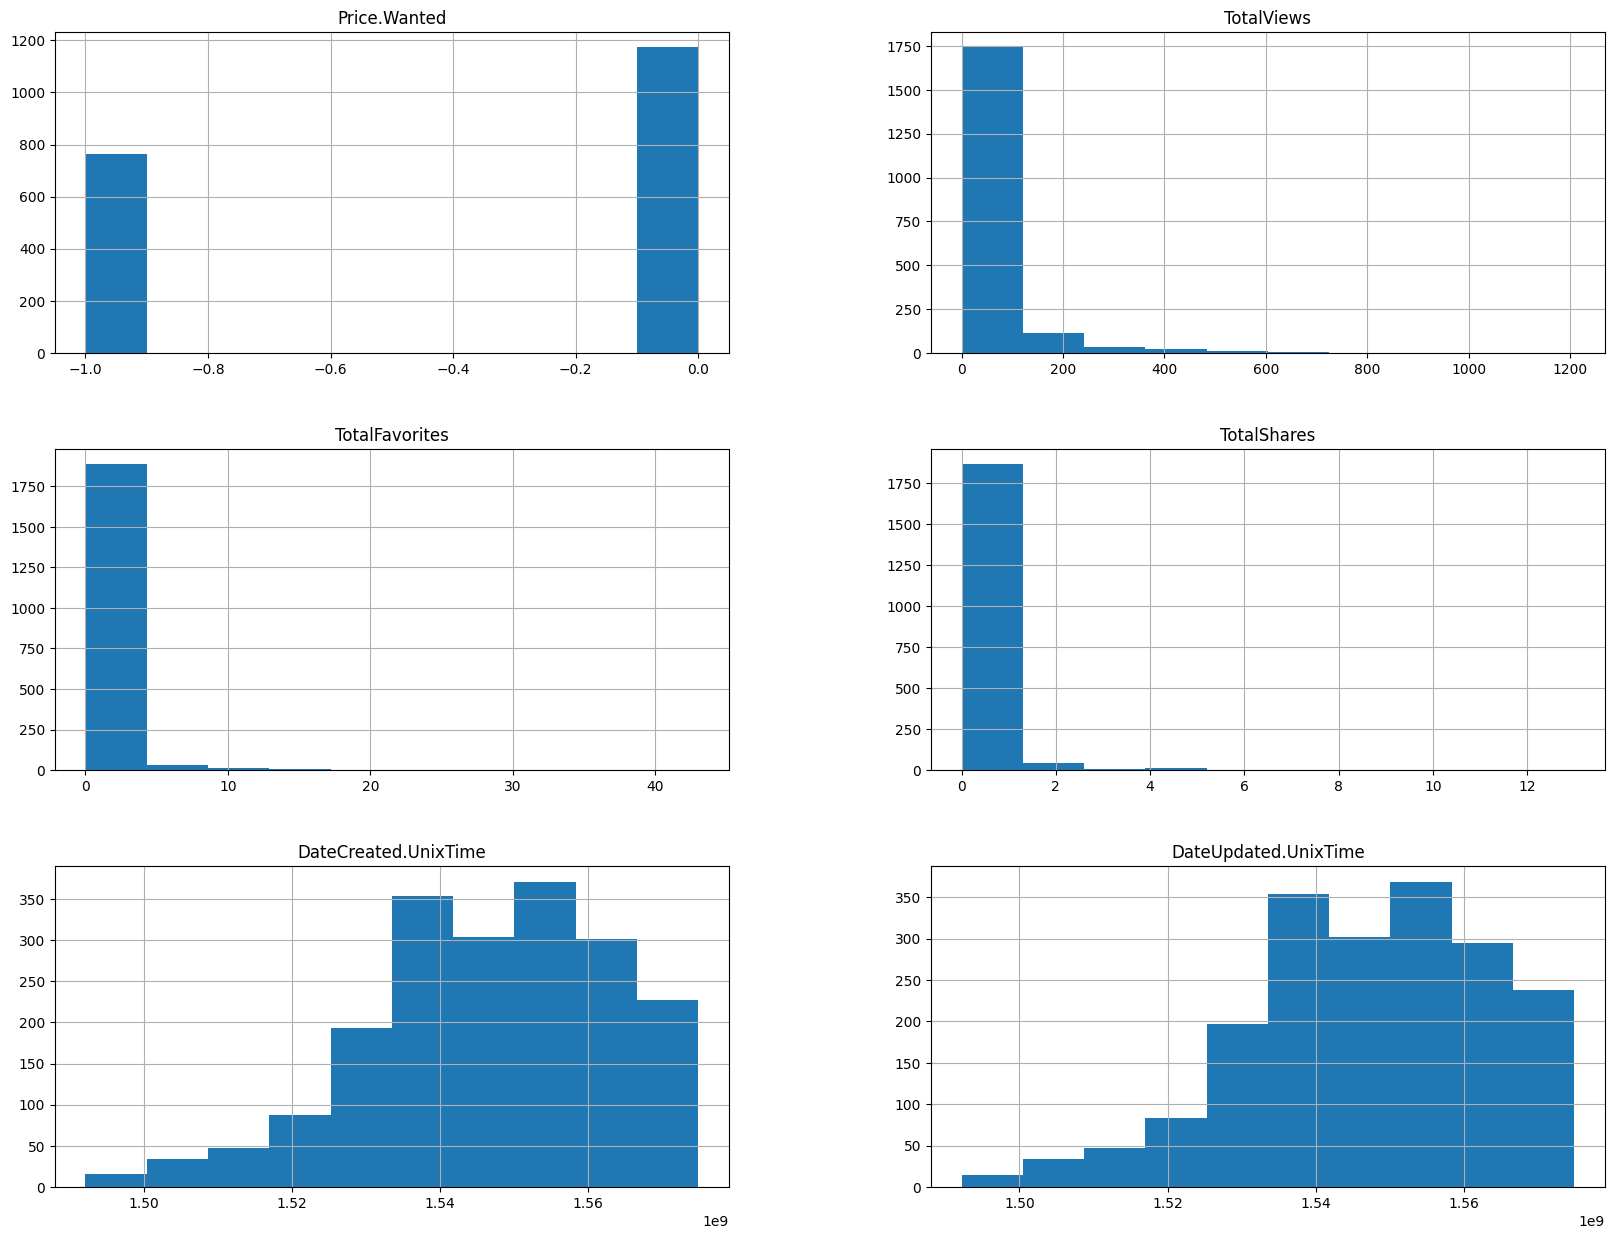

In [253]:
priceLowerThan0.hist(bins=10, figsize=(20,15))

We can see that datacreated and dataUpdated are the same.
<br> Maybe a product that has been created a long time ago or modified after a long time is suspicious. <br>
We will check that later

## Before we continue we want to change the boolean variables to 0 and 1.

In [254]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

dataset_df["Invoice"] = encoder.fit_transform(dataset_df["Invoice"])
dataset_df["Shipping"] = encoder.fit_transform(dataset_df["Shipping"])

dataset_df.head()


,@id,Title,TitleSource,Description,Price.Wanted,Tags,Images,Status,Category.Name,CategoryRecognize.Id,...,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,Name,DateCreated.DateTime,DateCreated.UnixTime,DateUpdated.DateTime,DateUpdated.UnixTime
0,products-6081,משקפי שמש,אביזרים,חדשות,25,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...","[{""DominantColor"":""614233"",""Height"":2016,""Url""...",Cancel,אופנה ואביזרים,categories-2,...,0,0,0,0,0,Accessories,2017-08-27T18:19:35.3402978Z,1503857975,2017-08-27T18:20:05.8107454Z,1503858005
1,products-6129,מפה,סֵמֶל,180X220,15,"[{""Confidence"":51.181251525878906,""Id"":""tags-3...","[{""DominantColor"":""BD0F0E"",""Height"":640,""Url"":...",Cancel,אופנה ואביזרים,categories-2,...,0,0,0,0,0,Emblem,2017-08-28T10:47:04.7529867Z,1503917224,2017-08-28T10:47:44.5442782Z,1503917264
2,products-6638,סוללה לאופניים 36,לַיְלָה,מחיר בריצפה. לבוא לקחת עד מחר \r\n,150,"[{""Confidence"":53.291530609130859,""Id"":""tags-3...","[{""DominantColor"":""040401"",""Height"":320,""Url"":...",Sold,אופנה ואביזרים,categories-2,...,6,0,0,0,0,Night,2017-09-13T01:09:40.7816185Z,1505264980,2017-09-17T05:11:24.7711012Z,1505625084
3,products-7397,תיק לנערות.,תיק,לקנות כמות נייד 0543973423 אייל,35,"[{""Confidence"":56.021137237548835,""Id"":""tags-3...","[{""DominantColor"":""A57B26"",""Height"":414.0,""Url...",Cancel,אופנה ואביזרים,categories-2,...,14,0,3,1,1,NaN,2017-10-04T14:25:35.1321402Z,1507127135,2017-10-13T13:03:05.9521127Z,1507899785
4,products-6730,שרשרת זהב איטלקי 14 קראט,אביזרים,זהב איטלקי 14 קראט חתום .\r\nיוצר בעבודת יד מי...,2800,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...","[{""DominantColor"":""4C3C2C"",""Height"":4608.0,""Ur...",Sold,אופנה ואביזרים,categories-2,...,31,0,0,0,0,Accessories,2017-09-15T16:17:59.5901541Z,1505492279,2017-10-08T00:20:15.7170202Z,1507422015


In [255]:
# checking the status values:
dataset_df["Status"].unique()

array(['Cancel', 'Sold', 'Available', 'Reject'], dtype=object)

In [256]:
dataset_df["Status"] = encoder.fit_transform(dataset_df["Status"])
dataset_df.head()


,@id,Title,TitleSource,Description,Price.Wanted,Tags,Images,Status,Category.Name,CategoryRecognize.Id,...,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,Name,DateCreated.DateTime,DateCreated.UnixTime,DateUpdated.DateTime,DateUpdated.UnixTime
0,products-6081,משקפי שמש,אביזרים,חדשות,25,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...","[{""DominantColor"":""614233"",""Height"":2016,""Url""...",1,אופנה ואביזרים,categories-2,...,0,0,0,0,0,Accessories,2017-08-27T18:19:35.3402978Z,1503857975,2017-08-27T18:20:05.8107454Z,1503858005
1,products-6129,מפה,סֵמֶל,180X220,15,"[{""Confidence"":51.181251525878906,""Id"":""tags-3...","[{""DominantColor"":""BD0F0E"",""Height"":640,""Url"":...",1,אופנה ואביזרים,categories-2,...,0,0,0,0,0,Emblem,2017-08-28T10:47:04.7529867Z,1503917224,2017-08-28T10:47:44.5442782Z,1503917264
2,products-6638,סוללה לאופניים 36,לַיְלָה,מחיר בריצפה. לבוא לקחת עד מחר \r\n,150,"[{""Confidence"":53.291530609130859,""Id"":""tags-3...","[{""DominantColor"":""040401"",""Height"":320,""Url"":...",3,אופנה ואביזרים,categories-2,...,6,0,0,0,0,Night,2017-09-13T01:09:40.7816185Z,1505264980,2017-09-17T05:11:24.7711012Z,1505625084
3,products-7397,תיק לנערות.,תיק,לקנות כמות נייד 0543973423 אייל,35,"[{""Confidence"":56.021137237548835,""Id"":""tags-3...","[{""DominantColor"":""A57B26"",""Height"":414.0,""Url...",1,אופנה ואביזרים,categories-2,...,14,0,3,1,1,NaN,2017-10-04T14:25:35.1321402Z,1507127135,2017-10-13T13:03:05.9521127Z,1507899785
4,products-6730,שרשרת זהב איטלקי 14 קראט,אביזרים,זהב איטלקי 14 קראט חתום .\r\nיוצר בעבודת יד מי...,2800,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...","[{""DominantColor"":""4C3C2C"",""Height"":4608.0,""Ur...",3,אופנה ואביזרים,categories-2,...,31,0,0,0,0,Accessories,2017-09-15T16:17:59.5901541Z,1505492279,2017-10-08T00:20:15.7170202Z,1507422015


In [257]:
encoder.classes_


array(['Available', 'Cancel', 'Reject', 'Sold'], dtype=object)

In [258]:
dataset_df["CategoryRecognize.Id"] = encoder.fit_transform(dataset_df["CategoryRecognize.Id"])
dataset_df.head()

,@id,Title,TitleSource,Description,Price.Wanted,Tags,Images,Status,Category.Name,CategoryRecognize.Id,...,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,Name,DateCreated.DateTime,DateCreated.UnixTime,DateUpdated.DateTime,DateUpdated.UnixTime
0,products-6081,משקפי שמש,אביזרים,חדשות,25,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...","[{""DominantColor"":""614233"",""Height"":2016,""Url""...",1,אופנה ואביזרים,1,...,0,0,0,0,0,Accessories,2017-08-27T18:19:35.3402978Z,1503857975,2017-08-27T18:20:05.8107454Z,1503858005
1,products-6129,מפה,סֵמֶל,180X220,15,"[{""Confidence"":51.181251525878906,""Id"":""tags-3...","[{""DominantColor"":""BD0F0E"",""Height"":640,""Url"":...",1,אופנה ואביזרים,1,...,0,0,0,0,0,Emblem,2017-08-28T10:47:04.7529867Z,1503917224,2017-08-28T10:47:44.5442782Z,1503917264
2,products-6638,סוללה לאופניים 36,לַיְלָה,מחיר בריצפה. לבוא לקחת עד מחר \r\n,150,"[{""Confidence"":53.291530609130859,""Id"":""tags-3...","[{""DominantColor"":""040401"",""Height"":320,""Url"":...",3,אופנה ואביזרים,1,...,6,0,0,0,0,Night,2017-09-13T01:09:40.7816185Z,1505264980,2017-09-17T05:11:24.7711012Z,1505625084
3,products-7397,תיק לנערות.,תיק,לקנות כמות נייד 0543973423 אייל,35,"[{""Confidence"":56.021137237548835,""Id"":""tags-3...","[{""DominantColor"":""A57B26"",""Height"":414.0,""Url...",1,אופנה ואביזרים,1,...,14,0,3,1,1,NaN,2017-10-04T14:25:35.1321402Z,1507127135,2017-10-13T13:03:05.9521127Z,1507899785
4,products-6730,שרשרת זהב איטלקי 14 קראט,אביזרים,זהב איטלקי 14 קראט חתום .\r\nיוצר בעבודת יד מי...,2800,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...","[{""DominantColor"":""4C3C2C"",""Height"":4608.0,""Ur...",3,אופנה ואביזרים,1,...,31,0,0,0,0,Accessories,2017-09-15T16:17:59.5901541Z,1505492279,2017-10-08T00:20:15.7170202Z,1507422015


In [259]:
encoder.classes_


array(['categories-1', 'categories-2', 'categories-33', 'categories-34',
       'categories-36', 'categories-38', 'categories-40', 'categories-97',
       nan], dtype=object)

Until now, we have encoded all the categorized variables. Now, let's check them and plot a correlation table.

array([[<Axes: title={'center': 'Price.Wanted'}>,
        <Axes: title={'center': 'Status'}>,
        <Axes: title={'center': 'CategoryRecognize.Id'}>],
       [<Axes: title={'center': 'TotalViews'}>,
        <Axes: title={'center': 'TotalFavorites'}>,
        <Axes: title={'center': 'TotalShares'}>],
       [<Axes: title={'center': 'Shipping'}>,
        <Axes: title={'center': 'Invoice'}>,
        <Axes: title={'center': 'DateCreated.UnixTime'}>],
       [<Axes: title={'center': 'DateUpdated.UnixTime'}>, <Axes: >,
        <Axes: >]], dtype=object)

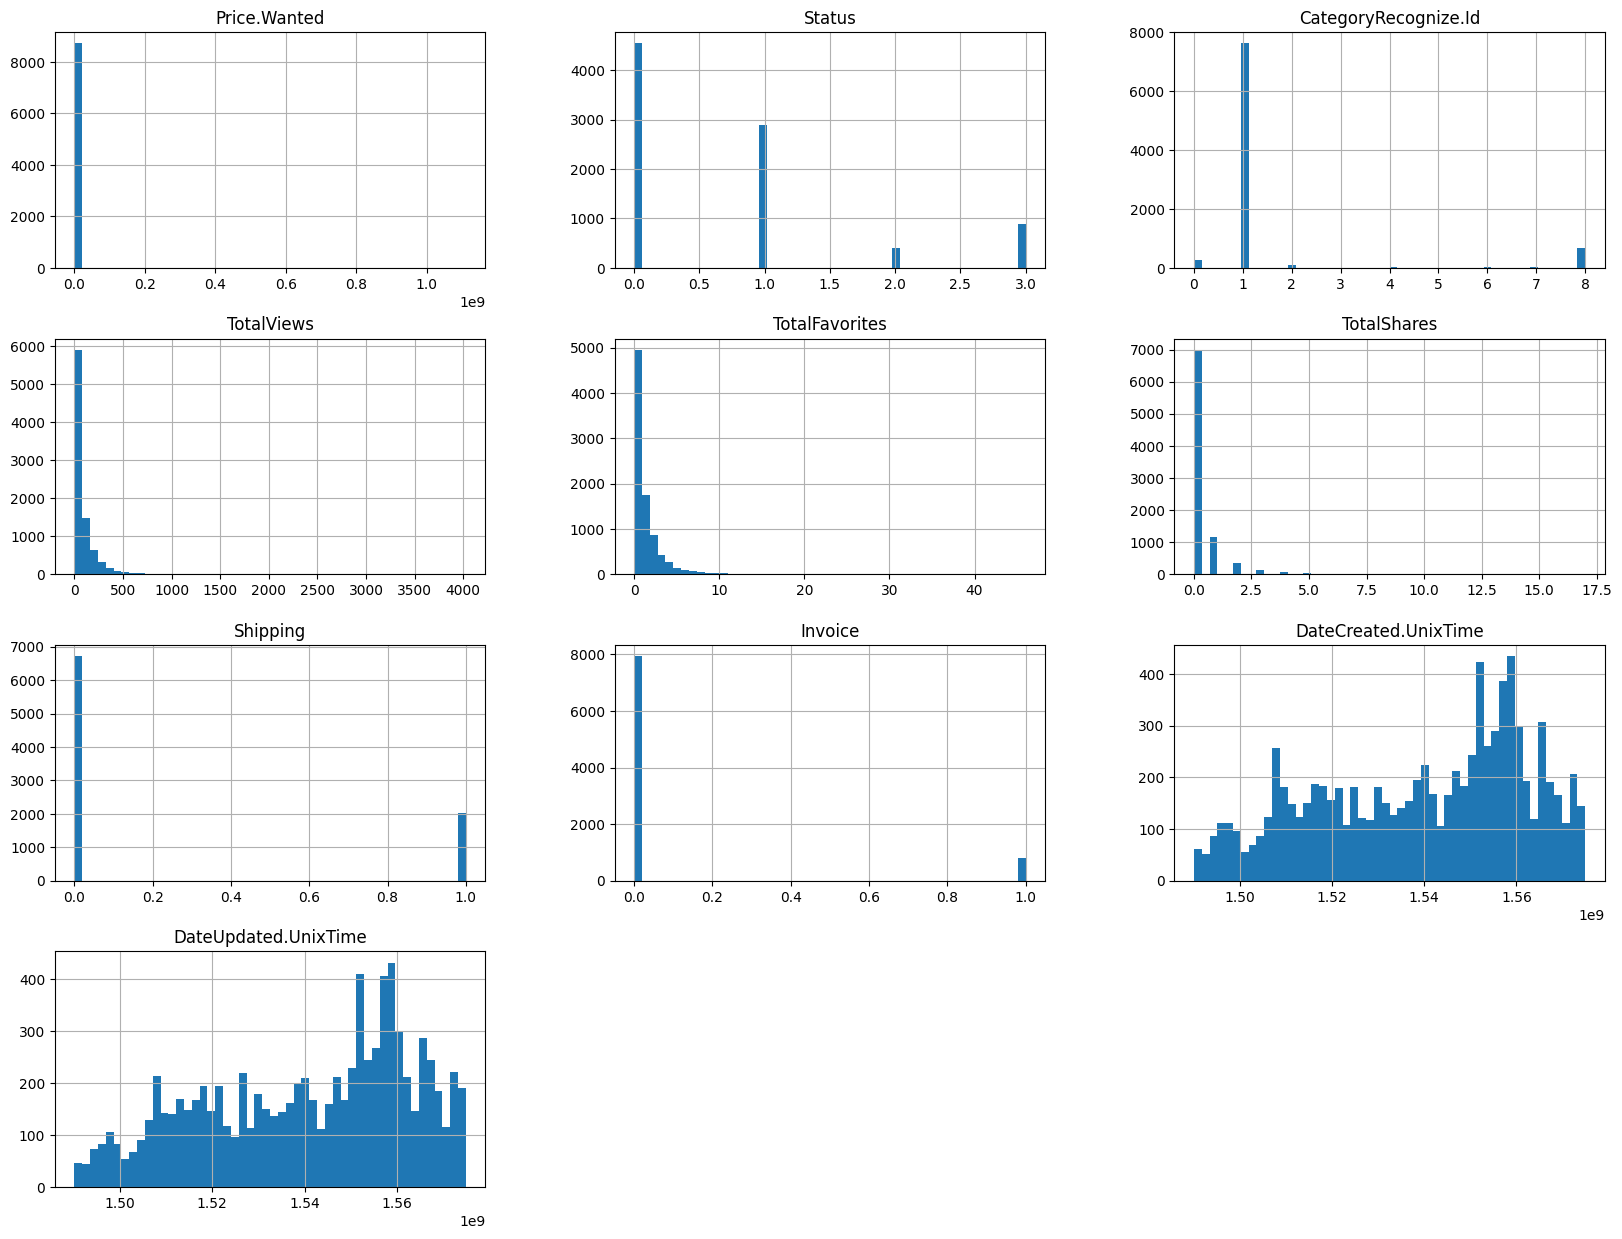

In [260]:
dataset_df.hist(bins=50, figsize=(20,15))

# Hypothesis:
1. there is a correlation between shipping and invoice
2. The category is somehow connected to Invoice

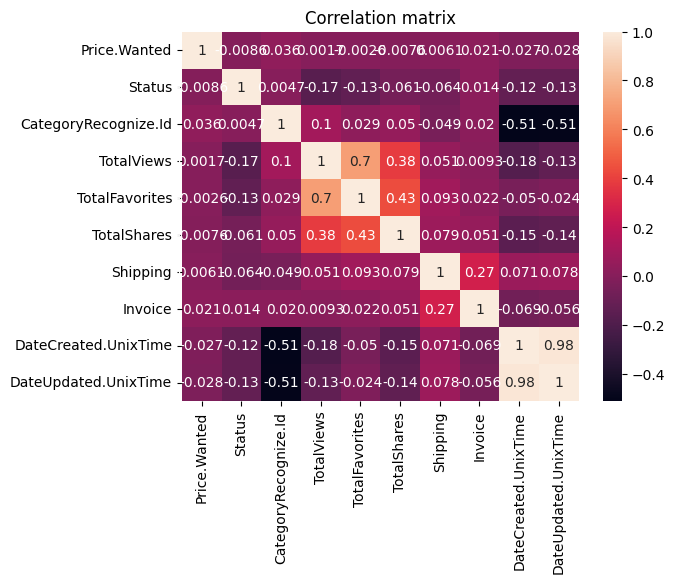

In [261]:
correlation_mat = dataset_df.corr(numeric_only=True)
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix")
plt.show()

We can see that DateCreated and DateUpdated are very connected and almost has a linear connection. <br>
In addition, total favorites and total views are connected but not strongly.

array([[<Axes: title={'center': 'Price.Wanted'}>,
        <Axes: title={'center': 'Status'}>,
        <Axes: title={'center': 'CategoryRecognize.Id'}>],
       [<Axes: title={'center': 'TotalViews'}>,
        <Axes: title={'center': 'TotalFavorites'}>,
        <Axes: title={'center': 'TotalShares'}>],
       [<Axes: title={'center': 'Shipping'}>,
        <Axes: title={'center': 'Invoice'}>,
        <Axes: title={'center': 'DateCreated.UnixTime'}>],
       [<Axes: title={'center': 'DateUpdated.UnixTime'}>, <Axes: >,
        <Axes: >]], dtype=object)

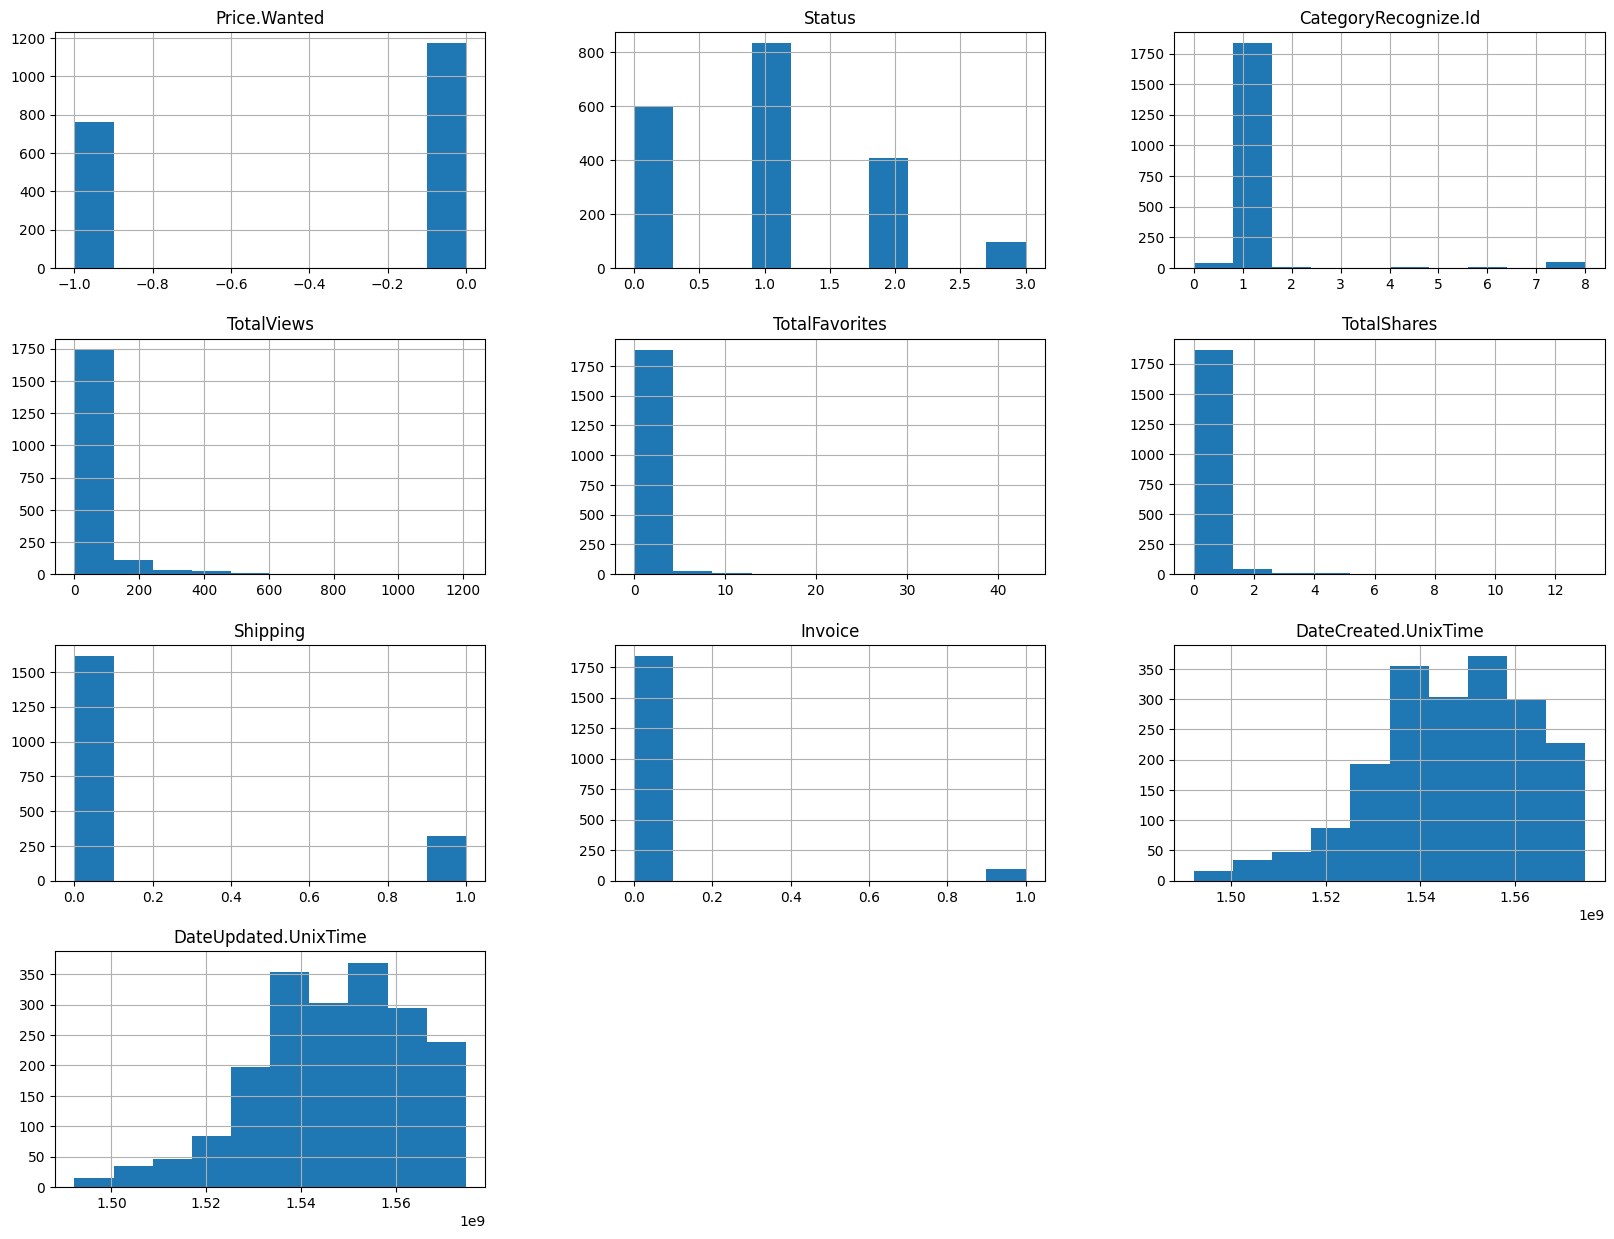

In [262]:
# let's check again the price lower than 0 
priceLowerThan0 = dataset_df.loc[dataset_df['Price.Wanted'] <= 0]
priceLowerThan0.hist(bins=10, figsize=(20,15))

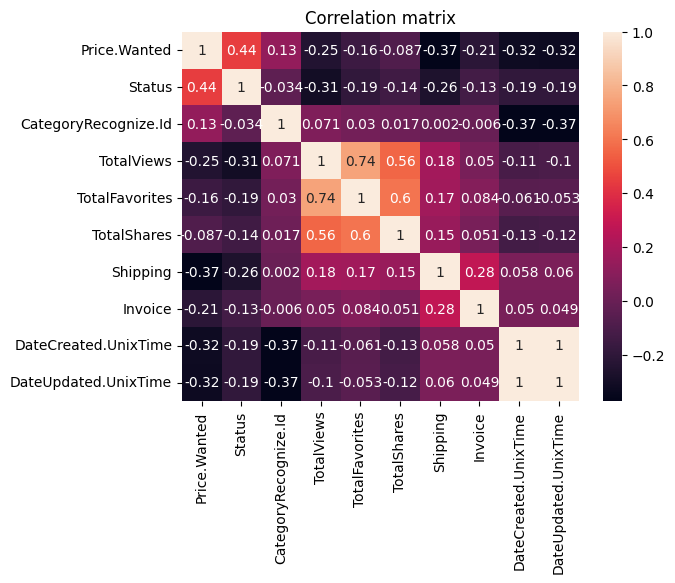

In [263]:
correlation_mat = priceLowerThan0.corr(numeric_only=True)
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix")
plt.show()

here, we can see that date created and updated are fully connected. <br> moreover, we have a connection between the total variables and we have a little connection between sttatus and price wanted. this is not surprsing because the range of prices is only 0 and -1. 

**To continue** we will normalize some of our data

In [264]:
dataset_df.head()

,@id,Title,TitleSource,Description,Price.Wanted,Tags,Images,Status,Category.Name,CategoryRecognize.Id,...,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,Name,DateCreated.DateTime,DateCreated.UnixTime,DateUpdated.DateTime,DateUpdated.UnixTime
0,products-6081,משקפי שמש,אביזרים,חדשות,25,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...","[{""DominantColor"":""614233"",""Height"":2016,""Url""...",1,אופנה ואביזרים,1,...,0,0,0,0,0,Accessories,2017-08-27T18:19:35.3402978Z,1503857975,2017-08-27T18:20:05.8107454Z,1503858005
1,products-6129,מפה,סֵמֶל,180X220,15,"[{""Confidence"":51.181251525878906,""Id"":""tags-3...","[{""DominantColor"":""BD0F0E"",""Height"":640,""Url"":...",1,אופנה ואביזרים,1,...,0,0,0,0,0,Emblem,2017-08-28T10:47:04.7529867Z,1503917224,2017-08-28T10:47:44.5442782Z,1503917264
2,products-6638,סוללה לאופניים 36,לַיְלָה,מחיר בריצפה. לבוא לקחת עד מחר \r\n,150,"[{""Confidence"":53.291530609130859,""Id"":""tags-3...","[{""DominantColor"":""040401"",""Height"":320,""Url"":...",3,אופנה ואביזרים,1,...,6,0,0,0,0,Night,2017-09-13T01:09:40.7816185Z,1505264980,2017-09-17T05:11:24.7711012Z,1505625084
3,products-7397,תיק לנערות.,תיק,לקנות כמות נייד 0543973423 אייל,35,"[{""Confidence"":56.021137237548835,""Id"":""tags-3...","[{""DominantColor"":""A57B26"",""Height"":414.0,""Url...",1,אופנה ואביזרים,1,...,14,0,3,1,1,NaN,2017-10-04T14:25:35.1321402Z,1507127135,2017-10-13T13:03:05.9521127Z,1507899785
4,products-6730,שרשרת זהב איטלקי 14 קראט,אביזרים,זהב איטלקי 14 קראט חתום .\r\nיוצר בעבודת יד מי...,2800,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...","[{""DominantColor"":""4C3C2C"",""Height"":4608.0,""Ur...",3,אופנה ואביזרים,1,...,31,0,0,0,0,Accessories,2017-09-15T16:17:59.5901541Z,1505492279,2017-10-08T00:20:15.7170202Z,1507422015


Before we are checking the prices. We would like to boxplot the prices to check for weird values.

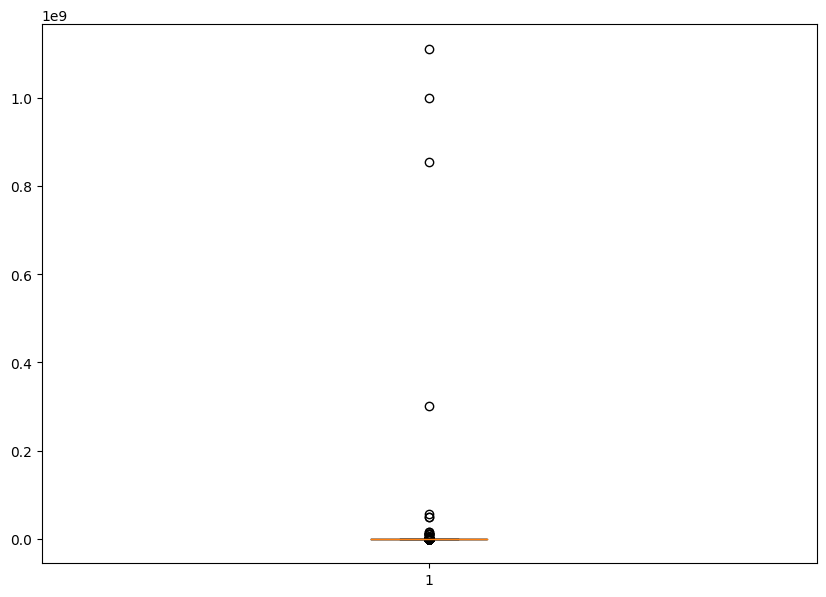

In [265]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(dataset_df["Price.Wanted"])
plt.show()

We can see that we have very few data above 0.2e9 so we will get rid of it.

In [266]:
dataset_df.loc[dataset_df["Price.Wanted"] > 0.2e9]

,@id,Title,TitleSource,Description,Price.Wanted,Tags,Images,Status,Category.Name,CategoryRecognize.Id,...,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,Name,DateCreated.DateTime,DateCreated.UnixTime,DateUpdated.DateTime,DateUpdated.UnixTime
282,products-1293,פיג'מה,פיג'מה,NaN,999999999,[],"[{""DominantColor"":null,""Height"":629.0,""Url"":""h...",1,אופנה ואביזרים,8,...,0,0,0,0,0,pajama,2017-04-24T11:54:11.1755681Z,1493034851,2017-04-24T12:15:14.0790593Z,1493036114
2571,products-21323-A,NaN,NaN,NaN,1111111111,"[{""Confidence"":98.355018615722656,""Id"":null,""L...","[{""DateCreate"":{""DateTime"":""2019-06-04T10:19:0...",0,אופנה,1,...,5,1,0,1,1,NaN,2018-07-12T23:28:13.4114974Z,1531438093,2018-07-14T00:02:21.7350511Z,1531526541
3241,products-1257,צמיד,מַסְמֵר,צמיד ציפןי זהב לא מבין בזה תציעו,854086889,[],"[{""DateCreate"":{""DateTime"":""2019-06-04T14:54:4...",0,אופנה ואביזרים,8,...,290,1,0,0,0,nail,2017-04-22T20:28:06.4530124Z,1492892886,2017-04-22T20:28:47.5704648Z,1492892927
6671,products-26490-A,NaN,NaN,NaN,300000000,"[{""Id"":null,""Name"":""human"",""Text"":""בן אנוש"",""L...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",0,אופנה,1,...,240,3,0,0,0,NaN,2018-10-16T14:33:05.1507969Z,1539700385,2018-10-18T00:02:25.7303118Z,1539820945


We can see that we have 2 products without title, maybe that's spam. we ca also see that we have a description of necklece with description price not determined and pijama with strange price. 
<br> we will modify those values.

In [267]:
ids_to_delete = ["products-1293", "products-21323-A", "products-26490-A"]
dataset_df = dataset_df[~dataset_df['@id'].isin(ids_to_delete)]

In [268]:
dataset_df["Price.Wanted"].loc[dataset_df["@id"] == "products-1257"]=0

In [269]:
dataset_df.loc[dataset_df["Price.Wanted"] > 0.2e9]

,@id,Title,TitleSource,Description,Price.Wanted,Tags,Images,Status,Category.Name,CategoryRecognize.Id,...,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,Name,DateCreated.DateTime,DateCreated.UnixTime,DateUpdated.DateTime,DateUpdated.UnixTime


now let's plot the boxplot again!!!

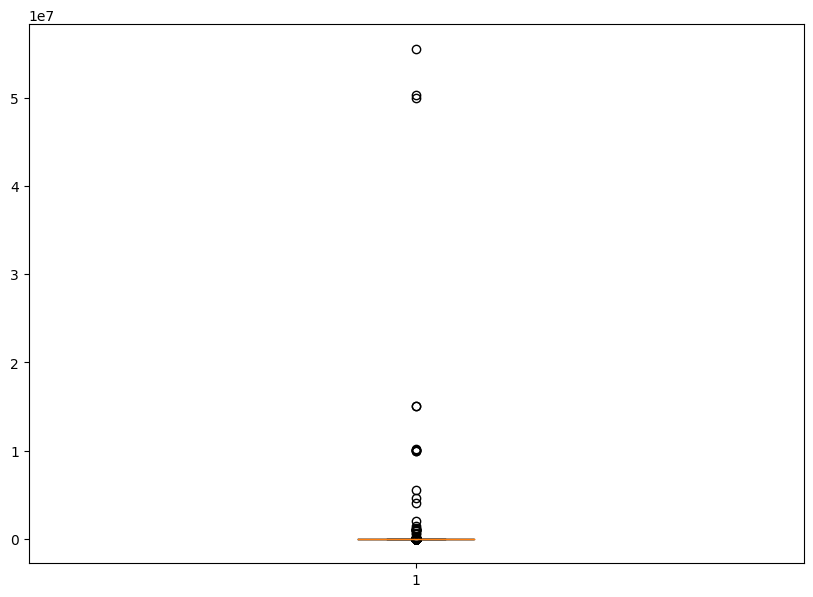

In [270]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(dataset_df["Price.Wanted"])
plt.show()

In [271]:
dataset_df.columns.values

array(['@id', 'Title', 'TitleSource', 'Description', 'Price.Wanted',
       'Tags', 'Images', 'Status', 'Category.Name',
       'CategoryRecognize.Id', 'CategoryRecognize.Name', 'Member.Id',
       'TotalViews', 'TotalFavorites', 'TotalShares', 'Shipping',
       'Invoice', 'Name', 'DateCreated.DateTime', 'DateCreated.UnixTime',
       'DateUpdated.DateTime', 'DateUpdated.UnixTime'], dtype=object)

In [272]:
dataset_df.loc[dataset_df["Price.Wanted"] > 0.2e7]

,@id,Title,TitleSource,Description,Price.Wanted,Tags,Images,Status,Category.Name,CategoryRecognize.Id,...,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,Name,DateCreated.DateTime,DateCreated.UnixTime,DateUpdated.DateTime,DateUpdated.UnixTime
62,products-9181,ישראל למכירה!!!,מבט מהאוויר,מדינה עם צבא חזק מאוד יחסית עם הרבה אויבים אבל...,4000000,"[{""Confidence"":86.335906982421875,""Id"":""tags-7...","[{""DominantColor"":""30699B"",""Height"":3456,""Url""...",1,אופנה,1,...,1,0,0,0,0,Aerial View,2017-11-10T20:45:20.5119267Z,1510346720,2017-11-11T06:07:54.5852646Z,1510380474
180,products-7588,hhh,אֲנָשִׁים,Hf,50323618,"[{""Confidence"":99.116012573242188,""Id"":""tags-1...","[{""DominantColor"":""4C5D3D"",""Height"":741.0,""Url...",1,אופנה ואביזרים,1,...,0,0,0,0,1,People,2017-10-08T17:09:30.8959510Z,1507482570,2017-10-08T18:25:08.1835965Z,1507487108
194,products-7758,מגבת שתאילנדי נגע בה,שְׂמִיכָה,זין\r\n,9999999,"[{""Confidence"":56.155796051025391,""Id"":""tags-3...","[{""DominantColor"":""46331C"",""Height"":1440.0,""Ur...",1,אופנה ואביזרים,1,...,0,0,0,0,0,Blanket,2017-10-12T19:38:36.2869869Z,1507837116,2017-10-12T19:45:36.2595499Z,1507837536
281,products-1275,נוֹצָה,נוֹצָה,NaN,55525555,[],"[{""DominantColor"":null,""Height"":2016.0,""Url"":""...",1,אופנה ואביזרים,8,...,0,0,0,0,0,quill,2017-04-23T16:25:05.6698855Z,1492964705,2017-04-23T16:25:27.7995794Z,1492964727
1196,products-27313-A,NaN,NaN,NaN,50000000,"[{""Confidence"":99.153602600097656,""Id"":null,""L...","[{""DateCreate"":{""DateTime"":""2018-11-01T14:37:3...",1,אופנה,1,...,0,0,0,1,1,NaN,2018-11-01T14:37:39.2054233Z,1541083059,2018-11-01T14:37:39.2054233Z,1541083059
1970,products-39841-A,+90 05551700273,NaN,NaN,10020080,"[{""Confidence"":99.834800720214844,""Id"":null,""L...","[{""DateCreate"":{""DateTime"":""2019-05-27T09:16:1...",1,אופנה,1,...,47,1,1,1,1,NaN,2019-05-27T09:16:15.4113842Z,1558948575,2019-05-27T09:16:18.6126273Z,1558948578
1971,products-39842-A,+90 05551700273,NaN,NaN,10020080,"[{""Confidence"":99.9970932006836,""Id"":null,""Lan...","[{""DateCreate"":{""DateTime"":""2019-05-27T09:19:3...",1,אופנה,1,...,32,0,0,1,1,NaN,2019-05-27T09:19:38.8734371Z,1558948778,2019-05-27T09:19:42.0322662Z,1558948782
1972,products-39843-A,+90 05551700273,NaN,NaN,10020080,"[{""Confidence"":99.962760925292969,""Id"":null,""L...","[{""DateCreate"":{""DateTime"":""2019-05-27T09:21:0...",1,אופנה,1,...,14,0,0,1,1,NaN,2019-05-27T09:21:06.8491121Z,1558948866,2019-05-27T09:21:09.0703492Z,1558948869
2243,products-28366-A,ילד בודד,NaN,זה דבר טוב מאוד וילד נחמד,9999999,"[{""Confidence"":98.92401123046875,""Id"":null,""La...","[{""DateCreate"":{""DateTime"":""2018-11-19T13:31:2...",1,אופנה,1,...,18,2,0,1,1,NaN,2018-11-19T13:31:25.3605149Z,1542634285,2018-11-20T07:33:38.8447973Z,1542699218
2387,products-16034,טבעת ציפורן,יהלום,1 ב30 שח\r\n2 ב50 שח\r\nאיסוף מבאר יעקב,4645454,"[{""Confidence"":50.5678825378418,""Id"":""tags-375...","[{""DateCreate"":{""DateTime"":""2018-11-07T19:10:5...",0,אופנה,1,...,137,1,1,0,0,NaN,2018-04-02T07:58:02.9727780Z,1522655882,2018-04-02T07:58:48.2537147Z,1522655928


This is data is very strange and probably kids that wanted to be funny. so, we can remove it.

In [273]:
dataset_df = dataset_df.loc[dataset_df["Price.Wanted"] <= 0.2e7]

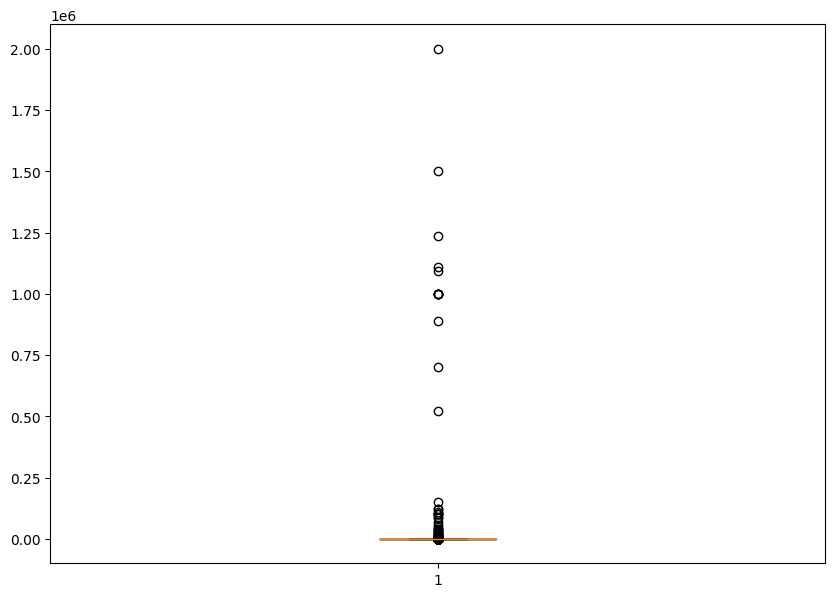

In [274]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(dataset_df["Price.Wanted"])
plt.show()

We are doing it for fun there is probably a better way without manually checking it

In [275]:
dataset_df.loc[dataset_df["Price.Wanted"] > 0.2e6]

,@id,Title,TitleSource,Description,Price.Wanted,Tags,Images,Status,Category.Name,CategoryRecognize.Id,...,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,Name,DateCreated.DateTime,DateCreated.UnixTime,DateUpdated.DateTime,DateUpdated.UnixTime
331,products-3081,קבינט,קבינט,NaN,2000000,[],"[{""DominantColor"":null,""Height"":320.0,""Url"":""h...",1,אופנה ואביזרים,8,...,0,0,0,0,0,Cabinet,2017-06-09T09:30:00.0421717Z,1497000600,2017-06-09T09:30:28.2836805Z,1497000628
400,products-8264,רגל בחינם,אֲנָשִׁים,משהו טוב ועמיד נגד מים,1000000,"[{""Confidence"":99.116012573242188,""Id"":""tags-1...","[{""DominantColor"":""B35117"",""Height"":1440.0,""Ur...",1,אופנה ואביזרים,1,...,0,0,0,1,1,People,2017-10-22T18:10:31.1518844Z,1508695831,2017-10-22T18:11:25.5698202Z,1508695885
404,products-8299,י,סַפָּה,\r\nח\r\n\r\n,700000,"[{""Confidence"":53.147079467773438,""Id"":""tags-3...","[{""DominantColor"":""1E455F"",""Height"":1440.0,""Ur...",1,אופנה ואביזרים,1,...,0,0,0,0,0,Couch,2017-10-24T07:36:05.4173876Z,1508830565,2017-10-24T07:48:14.1445311Z,1508831294
409,products-8514,אֲנָשִׁים,אֲנָשִׁים,ן,888888,"[{""Confidence"":99.116012573242188,""Id"":""tags-1...","[{""DominantColor"":""2C5F2C"",""Height"":1440.0,""Ur...",1,אופנה ואביזרים,1,...,1,0,0,0,0,People,2017-10-30T07:36:06.3470167Z,1509348966,2017-10-30T08:33:43.5833163Z,1509352423
531,products-11837,כנרע,הַלבָּשָׁה,\r\nרגככ\r\n,1000000,"[{""Confidence"":50.69281005859375,""Id"":""tags-83...","[{""DominantColor"":""776254"",""Height"":1600.0,""Ur...",1,אופנה,1,...,0,0,0,1,1,Clothing,2018-01-16T00:05:04.1886336Z,1516061104,2018-01-16T00:05:46.0969731Z,1516061146
813,products-18625-A,הודי,NaN,מיוצר בהודו שנת 2000 כמו חדש,1000000,"[{""Confidence"":99.0573501586914,""Id"":null,""Lan...","[{""DominantColor"":""1469B7"",""Height"":2016.0,""Ur...",1,אופנה,1,...,0,0,0,1,0,NaN,2018-05-21T21:45:54.9512981Z,1526939154,2018-05-21T21:47:19.9169633Z,1526939239
1737,products-39277-A,NaN,NaN,NaN,520865,"[{""Confidence"":99.331130981445313,""Id"":null,""L...","[{""DateCreate"":{""DateTime"":""2019-05-17T18:40:1...",1,אופנה,1,...,0,0,0,0,0,NaN,2019-05-17T18:40:12.9929920Z,1558118412,2019-05-17T18:40:12.9929920Z,1558118412
2992,products-10305,חוטיני נדיר חדש עם תוויות,רְהִיטִים,.,1111111,"[{""Confidence"":56.901504516601563,""Id"":""tags-1...","[{""DateCreate"":{""DateTime"":""2018-11-16T10:00:2...",0,אופנה,1,...,480,2,2,1,0,Furniture,2017-12-10T02:05:42.7352923Z,1512871542,2017-12-10T13:02:20.0733726Z,1512910940
4003,products-6217,😘😘😘😘😘,אֲנָשִׁים,🤗🤗🙄🙄🙄🙄,1234567,"[{""Confidence"":99.116012573242188,""Id"":""tags-1...","[{""DateCreate"":{""DateTime"":""2019-06-27T19:55:3...",1,אופנה ואביזרים,1,...,5,0,2,0,1,People,2017-08-31T12:17:07.1859176Z,1504181827,2017-09-05T12:04:43.8685468Z,1504613083
4512,products-10604,חדשה מהקופסא,צוֹמֵחַ,עובד 100%,1000000,"[{""Confidence"":56.901504516601563,""Id"":""tags-1...","[{""DateCreate"":{""DateTime"":""2019-08-11T10:21:4...",1,אופנה,1,...,0,0,0,0,0,Flora,2017-12-17T19:31:18.8643024Z,1513539078,2017-12-17T19:32:47.9185717Z,1513539167


In [276]:
df_null = dataset_df[dataset_df['Title'].isna()]


before we continue, we would like to check all the null values.

array([[<Axes: title={'center': 'Price.Wanted'}>,
        <Axes: title={'center': 'Status'}>,
        <Axes: title={'center': 'CategoryRecognize.Id'}>],
       [<Axes: title={'center': 'TotalViews'}>,
        <Axes: title={'center': 'TotalFavorites'}>,
        <Axes: title={'center': 'TotalShares'}>],
       [<Axes: title={'center': 'Shipping'}>,
        <Axes: title={'center': 'Invoice'}>,
        <Axes: title={'center': 'DateCreated.UnixTime'}>],
       [<Axes: title={'center': 'DateUpdated.UnixTime'}>, <Axes: >,
        <Axes: >]], dtype=object)

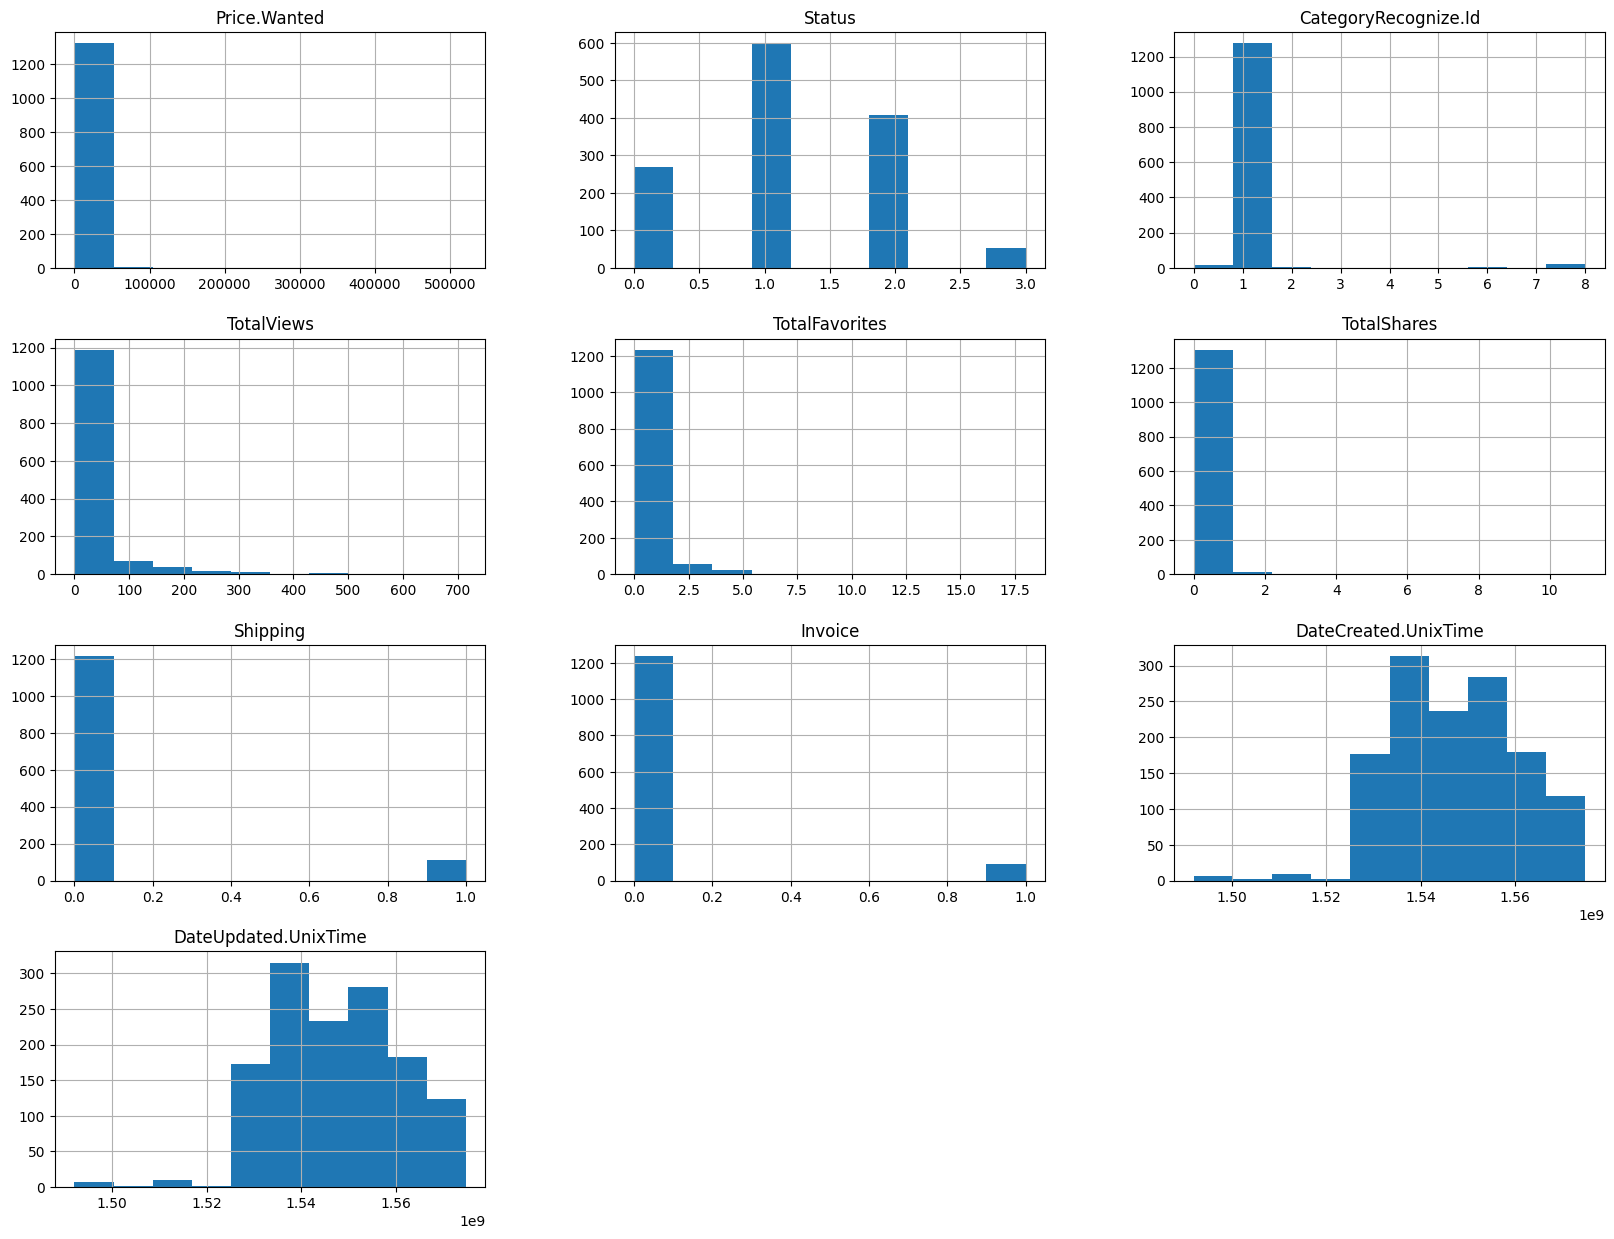

In [277]:
df_null.hist(bins=10, figsize=(20,15))

In [278]:
df_null.describe()

,Price.Wanted,Status,CategoryRecognize.Id,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,DateCreated.UnixTime,DateUpdated.UnixTime
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1.328000e+03,1.328000e+03
mean,748.512801,1.185994,1.137048,24.152861,0.333584,0.095633,0.085090,0.068524,1.547413e+09,1.547612e+09
std,14950.392025,0.798010,0.987891,63.112559,1.176004,0.494777,0.279121,0.252738,1.353000e+07,1.358128e+07
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.491999e+09,1.491999e+09
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.537437e+09,1.537620e+09
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.547104e+09,1.547318e+09
75%,0.000000,2.000000,1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,1.557676e+09,1.557925e+09
max,520865.000000,3.000000,8.000000,715.000000,18.000000,11.000000,1.000000,1.000000,1.574796e+09,1.574805e+09


In [279]:
df_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 14 to 8716
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   @id                     1328 non-null   object
 1   Title                   0 non-null      object
 2   TitleSource             0 non-null      object
 3   Description             120 non-null    object
 4   Price.Wanted            1328 non-null   int64 
 5   Tags                    1328 non-null   object
 6   Images                  1328 non-null   object
 7   Status                  1328 non-null   int32 
 8   Category.Name           1328 non-null   object
 9   CategoryRecognize.Id    1328 non-null   int32 
 10  CategoryRecognize.Name  1305 non-null   object
 11  Member.Id               1328 non-null   object
 12  TotalViews              1328 non-null   int64 
 13  TotalFavorites          1328 non-null   int64 
 14  TotalShares             1328 non-null   int64 
 15  Shipping

In [280]:
df_null

,@id,Title,TitleSource,Description,Price.Wanted,Tags,Images,Status,Category.Name,CategoryRecognize.Id,...,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,Name,DateCreated.DateTime,DateCreated.UnixTime,DateUpdated.DateTime,DateUpdated.UnixTime
14,products-11059,NaN,NaN,NaN,100,[],"[{""DominantColor"":""946237"",""Height"":772.0,""Url...",1,אופנה,8,...,26,0,0,0,0,NaN,2017-12-27T08:23:27.2317760Z,1514363007,2017-12-27T09:00:17.7050637Z,1514365217
38,products-6969,NaN,NaN,NaN,0,[],"[{""DominantColor"":null,""Height"":3120,""Url"":""ht...",1,אופנה ואביזרים,8,...,4,0,0,0,0,NaN,2017-09-21T17:15:45.9898770Z,1506014145,2017-09-22T09:35:35.6337187Z,1506072935
47,products-1519,NaN,NaN,NaN,250,[],"[{""DominantColor"":null,""Height"":663,""Url"":""htt...",1,אופנה ואביזרים,8,...,35,1,0,0,0,NaN,2017-05-02T08:17:39.1100996Z,1493713059,2017-05-02T08:17:56.2468639Z,1493713076
51,products-1526,NaN,NaN,NaN,30,[],"[{""DominantColor"":null,""Height"":2016,""Url"":""ht...",1,אופנה ואביזרים,8,...,82,4,0,0,0,NaN,2017-05-02T11:01:16.2956128Z,1493722876,2017-05-02T11:01:27.0584626Z,1493722887
53,products-3938,NaN,NaN,שעון,70,[],"[{""DominantColor"":null,""Height"":1052,""Url"":""ht...",1,אופנה ואביזרים,8,...,37,1,0,1,1,NaN,2017-06-25T15:06:58.2050850Z,1498403218,2017-06-25T15:07:22.8206609Z,1498403242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8600,products-36751-A,NaN,NaN,חדש סגור,200,"[{""Id"":null,""Name"":""paper"",""Text"":""עיתון"",""Lan...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",0,אופנה,0,...,169,0,0,0,0,NaN,2019-04-22T10:00:54.1212254Z,1555927254,2019-04-25T10:17:24.5680134Z,1556187444
8612,products-37671-A,NaN,NaN,NaN,200,"[{""Id"":null,""Name"":""apparel"",""Text"":""הלבשה"",""L...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",0,אופנה,1,...,35,1,0,0,0,NaN,2019-05-01T20:02:09.5077456Z,1556740929,2019-05-01T20:02:12.4944968Z,1556740932
8680,products-42419-A,NaN,NaN,NaN,0,"[{""Id"":null,""Name"":""wristwatch"",""Text"":""שעון י...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",0,אופנה,1,...,109,4,4,0,0,NaN,2019-07-22T09:22:29.3589619Z,1563787349,2019-07-24T00:02:33.7269106Z,1563926553
8705,products-32545-A,NaN,NaN,NaN,-1,"[{""Id"":null,""Name"":""accessory"",""Text"":""אבזר"",""...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",0,אופנה,1,...,162,1,0,0,0,NaN,2019-02-15T16:40:25.3064906Z,1550248825,2019-02-15T16:40:28.9975666Z,1550248828


For now we will remove the nan data.

In [281]:
#removing the NaN data
dataset_df = dataset_df[~dataset_df['Title'].isna()]
dataset_df


,@id,Title,TitleSource,Description,Price.Wanted,Tags,Images,Status,Category.Name,CategoryRecognize.Id,...,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,Name,DateCreated.DateTime,DateCreated.UnixTime,DateUpdated.DateTime,DateUpdated.UnixTime
0,products-6081,משקפי שמש,אביזרים,חדשות,25,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...","[{""DominantColor"":""614233"",""Height"":2016,""Url""...",1,אופנה ואביזרים,1,...,0,0,0,0,0,Accessories,2017-08-27T18:19:35.3402978Z,1503857975,2017-08-27T18:20:05.8107454Z,1503858005
1,products-6129,מפה,סֵמֶל,180X220,15,"[{""Confidence"":51.181251525878906,""Id"":""tags-3...","[{""DominantColor"":""BD0F0E"",""Height"":640,""Url"":...",1,אופנה ואביזרים,1,...,0,0,0,0,0,Emblem,2017-08-28T10:47:04.7529867Z,1503917224,2017-08-28T10:47:44.5442782Z,1503917264
2,products-6638,סוללה לאופניים 36,לַיְלָה,מחיר בריצפה. לבוא לקחת עד מחר \r\n,150,"[{""Confidence"":53.291530609130859,""Id"":""tags-3...","[{""DominantColor"":""040401"",""Height"":320,""Url"":...",3,אופנה ואביזרים,1,...,6,0,0,0,0,Night,2017-09-13T01:09:40.7816185Z,1505264980,2017-09-17T05:11:24.7711012Z,1505625084
3,products-7397,תיק לנערות.,תיק,לקנות כמות נייד 0543973423 אייל,35,"[{""Confidence"":56.021137237548835,""Id"":""tags-3...","[{""DominantColor"":""A57B26"",""Height"":414.0,""Url...",1,אופנה ואביזרים,1,...,14,0,3,1,1,NaN,2017-10-04T14:25:35.1321402Z,1507127135,2017-10-13T13:03:05.9521127Z,1507899785
4,products-6730,שרשרת זהב איטלקי 14 קראט,אביזרים,זהב איטלקי 14 קראט חתום .\r\nיוצר בעבודת יד מי...,2800,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...","[{""DominantColor"":""4C3C2C"",""Height"":4608.0,""Ur...",3,אופנה ואביזרים,1,...,31,0,0,0,0,Accessories,2017-09-15T16:17:59.5901541Z,1505492279,2017-10-08T00:20:15.7170202Z,1507422015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8726,products-36490-A,צמיד ספורט כושר דגם M.A.C 2019,NaN,חדש באריזה צבע שחור. כחול. אדום.,80,"[{""Id"":null,""Name"":""wristwatch"",""Text"":""שעון י...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",0,אופנה,1,...,9,0,1,1,0,NaN,2019-04-17T14:36:07.3281353Z,1555511767,2019-04-19T00:02:17.8030071Z,1555632137
8727,products-45674-A,nike air vapromax 3 מקורי,NaN,nike air vapromax 3 מקורי נקנה לפני שבוע מידה ...,-1,"[{""Id"":null,""Name"":""apparel"",""Text"":""הלבשה"",""L...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",0,אופנה,1,...,154,0,0,0,0,NaN,2019-10-06T11:28:41.5297979Z,1570361321,2019-10-06T11:28:44.5317552Z,1570361324
8728,products-19822-A,נעלי פקקים מקצועיות מידה 7.5 אמריקאי(40.6),NaN,מצויינות מאדידס ארהב ננעלו פעמים בודדות,100,"[{""Id"":null,""Name"":""clothing"",""Text"":""הַלבָּשׁ...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",0,אופנה,1,...,1111,2,1,1,0,NaN,2018-06-15T08:43:53.7685140Z,1529052233,2019-11-25T10:08:56.7272555Z,1574676536
8729,products-48009-A,רחוב אנילביץ 35 בת ים,NaN,אבקות חלבון,200,"[{""Id"":null,""Name"":""clothing"",""Text"":""בגדים"",""...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",0,אופנה,1,...,1,0,0,0,0,NaN,2019-11-28T05:19:06.6175644Z,1574918346,2019-11-28T05:19:11.3675641Z,1574918351


In [282]:
dataset_df = dataset_df.loc[dataset_df["Price.Wanted"] < 0.2e6]

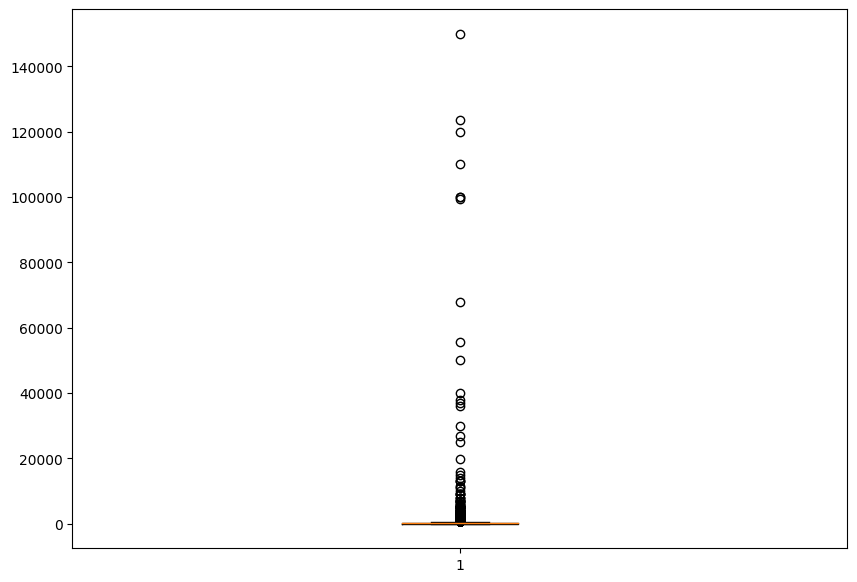

In [283]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(dataset_df["Price.Wanted"])
plt.show()

In [284]:
dataset_df.loc[dataset_df["Price.Wanted"] > 20000]

,@id,Title,TitleSource,Description,Price.Wanted,Tags,Images,Status,Category.Name,CategoryRecognize.Id,...,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,Name,DateCreated.DateTime,DateCreated.UnixTime,DateUpdated.DateTime,DateUpdated.UnixTime
197,products-7751,ארון לואי ויטון חדש בשקית,פְּרוֹזדוֹר,חדש ומבריק בשקית המקורית עם אחריות ל7 שנים במע...,50000,"[{""Confidence"":75.641708374023438,""Id"":""tags-4...","[{""DominantColor"":""C9B702"",""Height"":1440.0,""Ur...",1,אופנה ואביזרים,1,...,0,0,0,1,1,Corridor,2017-10-12T19:14:30.2265968Z,1507835670,2017-10-13T07:19:59.1467093Z,1507879199
336,products-3243,טבעת h.stern,גָבִישׁ,NaN,40000,"[{""Confidence"":50.5678825378418,""Id"":""tags-375...","[{""DominantColor"":null,""Height"":600.0,""Url"":""h...",3,אופנה ואביזרים,8,...,2,1,0,0,0,NaN,2017-06-12T12:02:02.1816044Z,1497268922,2017-06-12T14:37:03.0158936Z,1497278223
426,products-8420,דיג'י למכיה,אֲנָשִׁים,6800,68000,"[{""Confidence"":99.116012573242188,""Id"":""tags-1...","[{""DominantColor"":""81704A"",""Height"":3024.0,""Ur...",1,אופנה ואביזרים,1,...,59,0,2,0,0,People,2017-10-27T07:59:57.6758838Z,1509091197,2017-10-31T20:59:15.6951804Z,1509483555
546,products-12289,חח,לִפְרוֹחַ,יי,100000,"[{""Confidence"":56.901504516601563,""Id"":""tags-1...","[{""DominantColor"":""AD731E"",""Height"":1440.0,""Ur...",1,אופנה,1,...,0,0,0,1,1,Blossom,2018-01-24T16:00:12.6684007Z,1516809612,2018-01-24T16:00:51.7911562Z,1516809651
564,products-12716,יאמא,אַסטרוֹנוֹמִיָה,NaN,99494,"[{""Confidence"":79.938446044921875,""Id"":""tags-3...","[{""DominantColor"":""0A0B0B"",""Height"":1440.0,""Ur...",1,אופנה,1,...,0,0,0,0,0,Astronomy,2018-01-30T22:03:34.0938220Z,1517349814,2018-01-31T08:48:02.9608711Z,1517388482
801,products-17898-A,Gggggg,NaN,NaN,55555,"[{""Confidence"":97.841743469238281,""Id"":null,""L...","[{""DominantColor"":""846A47"",""Height"":498.0,""Url...",1,אופנה,1,...,0,0,0,0,0,NaN,2018-05-15T07:00:09.5632607Z,1526367609,2018-05-15T07:00:09.5632607Z,1526367609
956,products-22340-A,לאנשים שמבינים בלבד ישן מאוד,NaN,NaN,110000,"[{""Confidence"":88.07293701171875,""Id"":null,""La...","[{""DominantColor"":""684B24"",""Height"":640.0,""Url...",1,אופנה,1,...,0,0,0,0,0,NaN,2018-07-31T14:30:35.6901512Z,1533047435,2018-07-31T14:34:55.1971722Z,1533047695
1814,products-39463-A,ילד חמוד חולה מלריה נמכר עקב חוסר שימוש,NaN,NaN,120000,"[{""Confidence"":99.8587646484375,""Id"":null,""Lan...","[{""DateCreate"":{""DateTime"":""2019-05-21T06:28:0...",1,אופנה,1,...,1,0,0,0,0,NaN,2019-05-21T06:28:06.5538720Z,1558420086,2019-05-21T06:28:06.5538720Z,1558420086
1985,products-39999-A,9.00555E+12,NaN,NaN,100150,"[{""Confidence"":99.987983703613281,""Id"":null,""L...","[{""DateCreate"":{""DateTime"":""2019-05-29T18:26:3...",1,אופנה,1,...,2,0,0,1,1,NaN,2019-05-29T18:26:34.5249883Z,1559154394,2019-05-30T09:44:14.5223644Z,1559209454
2332,products-30821-A,Hublot Big Bang full Carbon Swiss 2018 limited...,NaN,עולה כ70000 שקל 17500$$$,37000,"[{""Confidence"":99.762649536132813,""Id"":null,""L...","[{""DateCreate"":{""DateTime"":""2019-01-11T05:14:3...",1,אופנה,1,...,24,0,0,1,0,NaN,2019-01-11T05:14:29.0288100Z,1547183669,2019-01-31T03:45:20.9318887Z,1548906320


<Axes: >

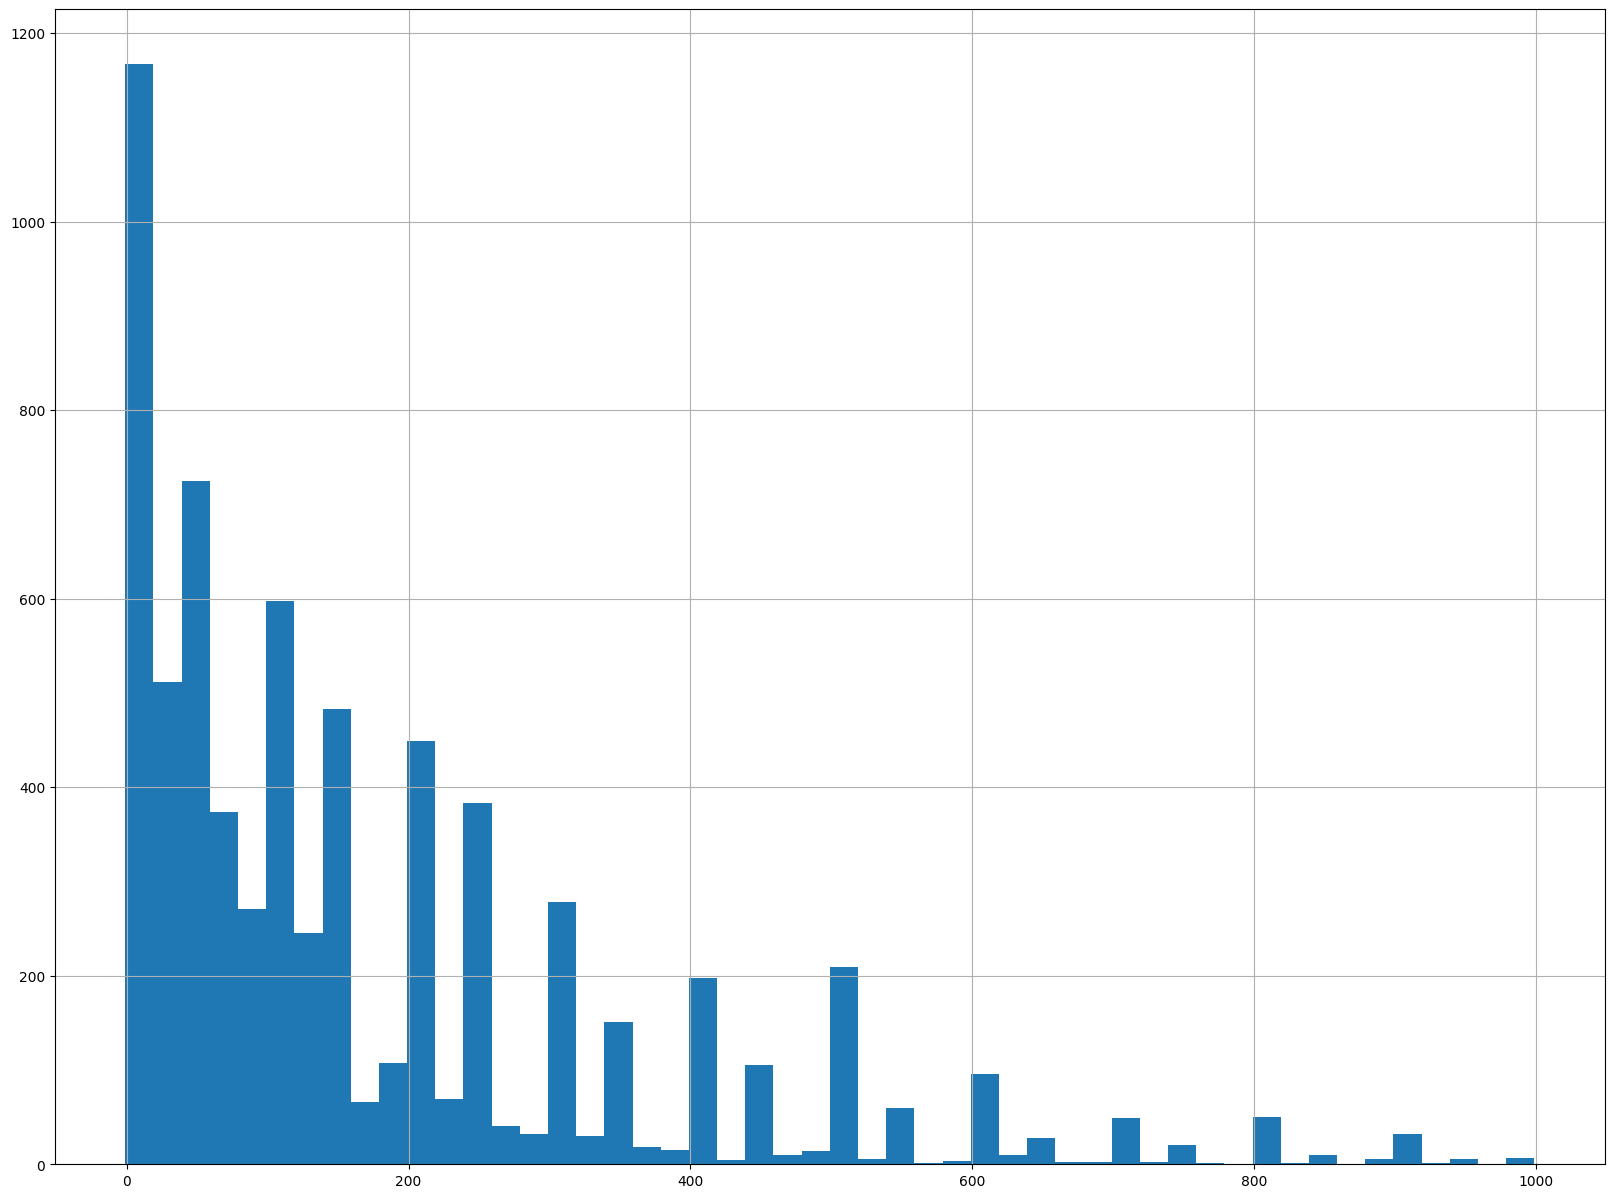

In [285]:
dataset_df["Price.Wanted"].loc[dataset_df["Price.Wanted"] < 1000].hist(bins=50, figsize=(20,15))

most of the products are below 200 ils. 

# Problem
a major problem in the data is that we cannot decide wether a product is spam or not. To overcome this problem we can use a semisupervised learning which means we manually label a small portion of the data as spam or not and we run the ML algorithm to detrermine the others. <br><br>
We won't do that now because it will take time to manually enter values to those labels.

We will continute with investigating the data more, by that we will find simple connection and garbage in the data before we analyze it. It's because when we train a model with garbage it will probably be led to overfitting or the model won't predict correctly the test_data.

array([[<Axes: title={'center': 'Price.Wanted'}>,
        <Axes: title={'center': 'Status'}>,
        <Axes: title={'center': 'CategoryRecognize.Id'}>],
       [<Axes: title={'center': 'TotalViews'}>,
        <Axes: title={'center': 'TotalFavorites'}>,
        <Axes: title={'center': 'TotalShares'}>],
       [<Axes: title={'center': 'Shipping'}>,
        <Axes: title={'center': 'Invoice'}>,
        <Axes: title={'center': 'DateCreated.UnixTime'}>],
       [<Axes: title={'center': 'DateUpdated.UnixTime'}>, <Axes: >,
        <Axes: >]], dtype=object)

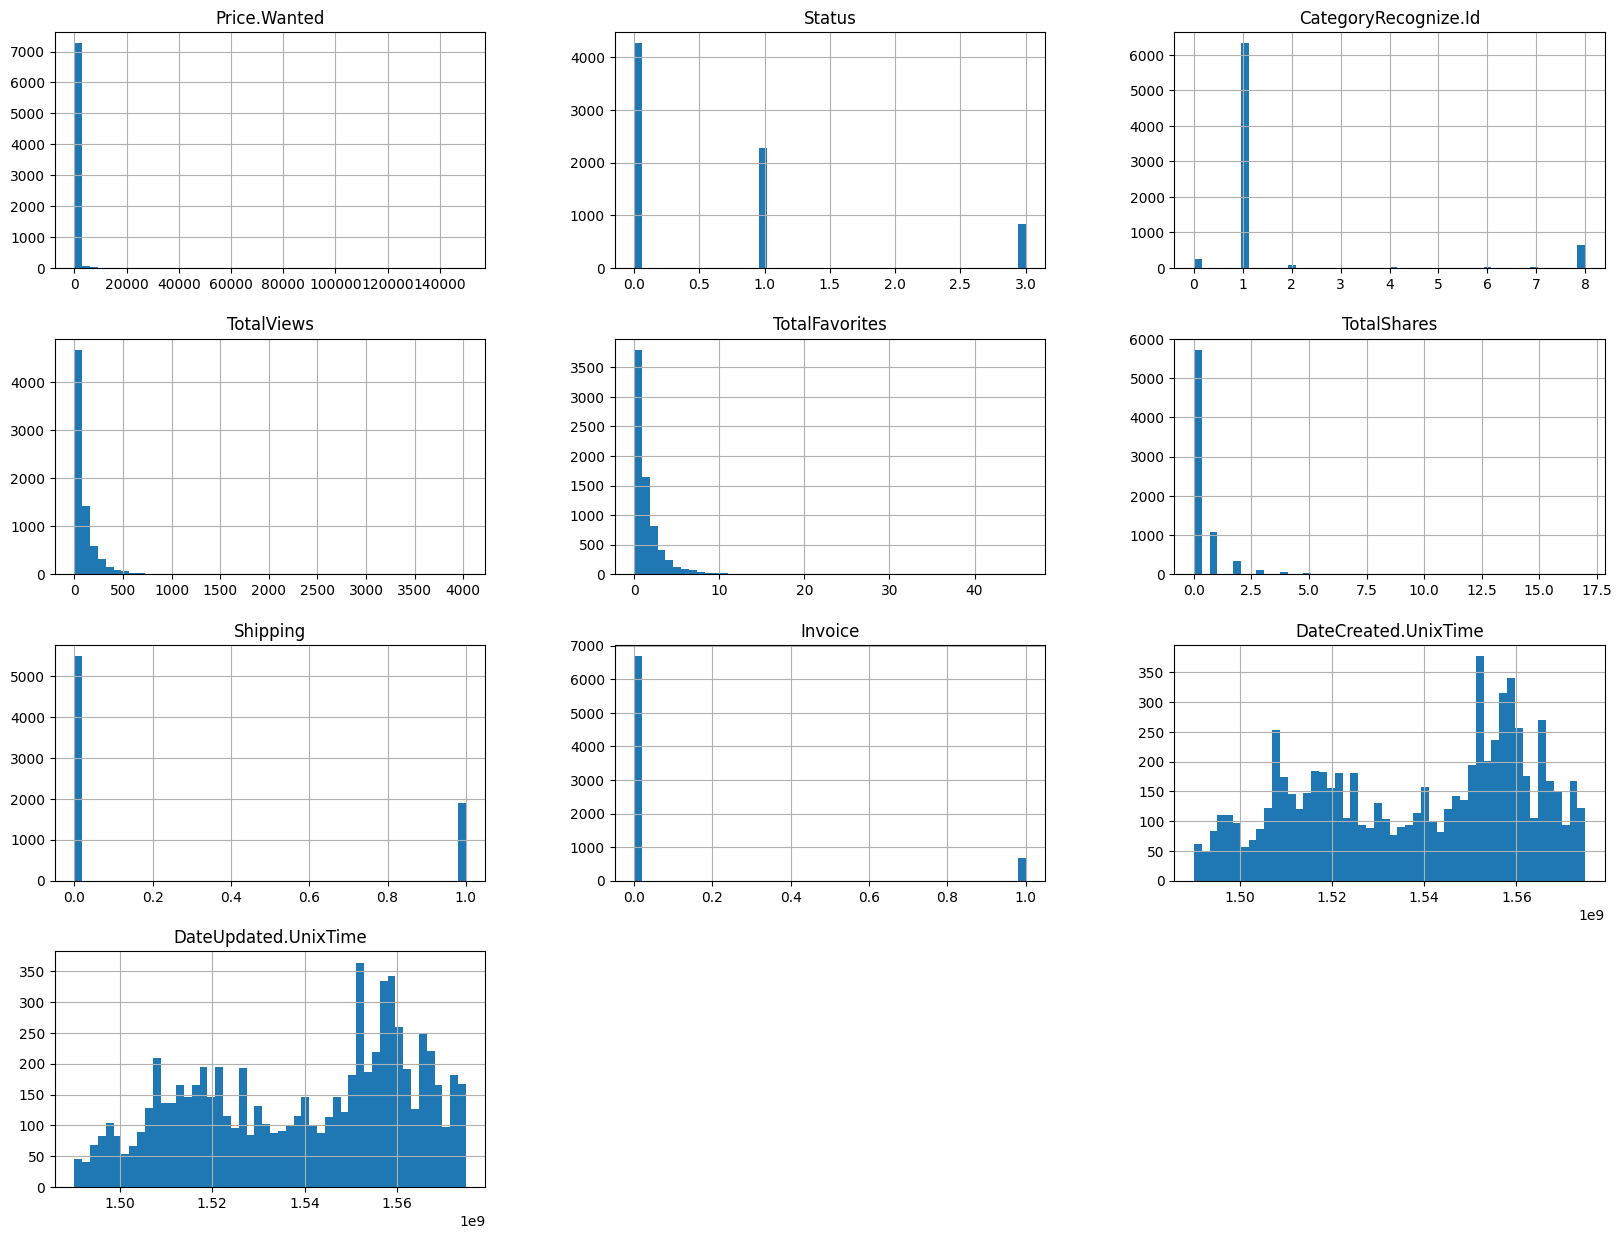

In [286]:
# let's go back to simple analysis
dataset_df.hist(bins=50, figsize=(20,15))

the unix time and datetime in the dataset paremeters are the same but they are different representation. We will delete the datetime objects.

In [287]:
dataset_df = dataset_df.drop(["DateCreated.DateTime", "DateUpdated.DateTime"], axis=1)

In [288]:
dataset_df = dataset_df.reset_index().drop(["index"],axis=1) 
# updating the indexes because we removed some lines

In [289]:
dataset_df

,@id,Title,TitleSource,Description,Price.Wanted,Tags,Images,Status,Category.Name,CategoryRecognize.Id,CategoryRecognize.Name,Member.Id,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,Name,DateCreated.UnixTime,DateUpdated.UnixTime
0,products-6081,משקפי שמש,אביזרים,חדשות,25,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...","[{""DominantColor"":""614233"",""Height"":2016,""Url""...",1,אופנה ואביזרים,1,אופנה ואביזרים,members-129,0,0,0,0,0,Accessories,1503857975,1503858005
1,products-6129,מפה,סֵמֶל,180X220,15,"[{""Confidence"":51.181251525878906,""Id"":""tags-3...","[{""DominantColor"":""BD0F0E"",""Height"":640,""Url"":...",1,אופנה ואביזרים,1,אופנה ואביזרים,members-8233,0,0,0,0,0,Emblem,1503917224,1503917264
2,products-6638,סוללה לאופניים 36,לַיְלָה,מחיר בריצפה. לבוא לקחת עד מחר \r\n,150,"[{""Confidence"":53.291530609130859,""Id"":""tags-3...","[{""DominantColor"":""040401"",""Height"":320,""Url"":...",3,אופנה ואביזרים,1,אופנה ואביזרים,members-3672,6,0,0,0,0,Night,1505264980,1505625084
3,products-7397,תיק לנערות.,תיק,לקנות כמות נייד 0543973423 אייל,35,"[{""Confidence"":56.021137237548835,""Id"":""tags-3...","[{""DominantColor"":""A57B26"",""Height"":414.0,""Url...",1,אופנה ואביזרים,1,אופנה ואביזרים,members-14810,14,0,3,1,1,NaN,1507127135,1507899785
4,products-6730,שרשרת זהב איטלקי 14 קראט,אביזרים,זהב איטלקי 14 קראט חתום .\r\nיוצר בעבודת יד מי...,2800,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...","[{""DominantColor"":""4C3C2C"",""Height"":4608.0,""Ur...",3,אופנה ואביזרים,1,אופנה ואביזרים,members-13230,31,0,0,0,0,Accessories,1505492279,1507422015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,products-36490-A,צמיד ספורט כושר דגם M.A.C 2019,NaN,חדש באריזה צבע שחור. כחול. אדום.,80,"[{""Id"":null,""Name"":""wristwatch"",""Text"":""שעון י...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",0,אופנה,1,אופנה,members-65487-A,9,0,1,1,0,NaN,1555511767,1555632137
7370,products-45674-A,nike air vapromax 3 מקורי,NaN,nike air vapromax 3 מקורי נקנה לפני שבוע מידה ...,-1,"[{""Id"":null,""Name"":""apparel"",""Text"":""הלבשה"",""L...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",0,אופנה,1,אופנה,members-43648-A,154,0,0,0,0,NaN,1570361321,1570361324
7371,products-19822-A,נעלי פקקים מקצועיות מידה 7.5 אמריקאי(40.6),NaN,מצויינות מאדידס ארהב ננעלו פעמים בודדות,100,"[{""Id"":null,""Name"":""clothing"",""Text"":""הַלבָּשׁ...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",0,אופנה,1,אופנה,members-129,1111,2,1,1,0,NaN,1529052233,1574676536
7372,products-48009-A,רחוב אנילביץ 35 בת ים,NaN,אבקות חלבון,200,"[{""Id"":null,""Name"":""clothing"",""Text"":""בגדים"",""...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",0,אופנה,1,אופנה,members-81918-A,1,0,0,0,0,NaN,1574918346,1574918351


by looking at the data we can see the some product ids have A in the id. we would like check what it means

In [290]:
data_only_A = dataset_df.loc[dataset_df["@id"].str.endswith('A')]

In [291]:
data_only_A

,@id,Title,TitleSource,Description,Price.Wanted,Tags,Images,Status,Category.Name,CategoryRecognize.Id,CategoryRecognize.Name,Member.Id,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,Name,DateCreated.UnixTime,DateUpdated.UnixTime
775,products-17697-A,עכבר,NaN,NaN,200,"[{""Confidence"":99.3302230834961,""Id"":null,""Lan...","[{""DominantColor"":""9C912F"",""Height"":1512.0,""Ur...",1,אופנה,1,אופנה,members-129,0,0,0,0,0,NaN,1526294980,1526294980
777,products-17889-A,שמלת ערב של טוני בולס,NaN,2000,2000,"[{""Confidence"":99.281196594238281,""Id"":null,""L...","[{""DominantColor"":""913A45"",""Height"":812.0,""Url...",1,אופנה,8,NaN,members-19707,0,0,0,1,0,NaN,1526341691,1526365882
778,products-17898-A,Gggggg,NaN,NaN,55555,"[{""Confidence"":97.841743469238281,""Id"":null,""L...","[{""DominantColor"":""846A47"",""Height"":498.0,""Url...",1,אופנה,1,אופנה,members-129,0,0,0,0,0,NaN,1526367609,1526367609
780,products-18181-A,סמארט לייזר למסיבות ואירועים,NaN,מגיע עד 100 מטר מתאים לכל סוגי האירועים ;),0,"[{""Confidence"":76.776359558105469,""Id"":null,""L...","[{""DominantColor"":""0B060D"",""Height"":1440.0,""Ur...",1,אופנה,1,אופנה,members-14536,1,0,0,0,0,NaN,1526498485,1526498538
781,products-18289-A,1% רווח יומי מובטח,NaN,NaN,0,"[{""Confidence"":83.453651428222656,""Id"":null,""L...","[{""DominantColor"":""C18C0A"",""Height"":813.0,""Url...",1,אופנה,1,אופנה,members-11229,3,0,1,1,0,NaN,1526576410,1526576656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,products-36490-A,צמיד ספורט כושר דגם M.A.C 2019,NaN,חדש באריזה צבע שחור. כחול. אדום.,80,"[{""Id"":null,""Name"":""wristwatch"",""Text"":""שעון י...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",0,אופנה,1,אופנה,members-65487-A,9,0,1,1,0,NaN,1555511767,1555632137
7370,products-45674-A,nike air vapromax 3 מקורי,NaN,nike air vapromax 3 מקורי נקנה לפני שבוע מידה ...,-1,"[{""Id"":null,""Name"":""apparel"",""Text"":""הלבשה"",""L...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",0,אופנה,1,אופנה,members-43648-A,154,0,0,0,0,NaN,1570361321,1570361324
7371,products-19822-A,נעלי פקקים מקצועיות מידה 7.5 אמריקאי(40.6),NaN,מצויינות מאדידס ארהב ננעלו פעמים בודדות,100,"[{""Id"":null,""Name"":""clothing"",""Text"":""הַלבָּשׁ...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",0,אופנה,1,אופנה,members-129,1111,2,1,1,0,NaN,1529052233,1574676536
7372,products-48009-A,רחוב אנילביץ 35 בת ים,NaN,אבקות חלבון,200,"[{""Id"":null,""Name"":""clothing"",""Text"":""בגדים"",""...","[{""Url"":""https://yapp-prod.s3-accelerate.amazo...",0,אופנה,1,אופנה,members-81918-A,1,0,0,0,0,NaN,1574918346,1574918351


In [292]:
data_only_A.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4664 entries, 775 to 7373
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   @id                     4664 non-null   object
 1   Title                   4664 non-null   object
 2   TitleSource             1 non-null      object
 3   Description             3230 non-null   object
 4   Price.Wanted            4664 non-null   int64 
 5   Tags                    4664 non-null   object
 6   Images                  4664 non-null   object
 7   Status                  4664 non-null   int32 
 8   Category.Name           4664 non-null   object
 9   CategoryRecognize.Id    4664 non-null   int32 
 10  CategoryRecognize.Name  4658 non-null   object
 11  Member.Id               4664 non-null   object
 12  TotalViews              4664 non-null   int64 
 13  TotalFavorites          4664 non-null   int64 
 14  TotalShares             4664 non-null   int64 
 15  Shippin

First, we can see that product with A doesn't have Name and TitleSource.


In [293]:
data_only_A.describe()

,Price.Wanted,Status,CategoryRecognize.Id,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,DateCreated.UnixTime,DateUpdated.UnixTime
count,4664.000000,4664.000000,4664.000000,4664.000000,4664.000000,4664.000000,4664.000000,4664.000000,4.664000e+03,4.664000e+03
mean,390.144511,0.561321,1.019726,88.148799,1.315609,0.302101,0.302959,0.082547,1.553386e+09,1.554219e+09
std,3140.719658,0.949108,0.561886,137.057314,2.625671,0.783617,0.459587,0.275226,1.227691e+07,1.228885e+07
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.517669e+09,1.526295e+09
25%,40.000000,0.000000,1.000000,15.750000,0.000000,0.000000,0.000000,0.000000,1.545410e+09,1.546215e+09
50%,100.000000,0.000000,1.000000,45.000000,0.000000,0.000000,0.000000,0.000000,1.555327e+09,1.556188e+09
75%,280.000000,1.000000,1.000000,108.250000,2.000000,0.000000,1.000000,0.000000,1.561929e+09,1.563387e+09
max,120000.000000,3.000000,8.000000,4026.000000,46.000000,11.000000,1.000000,1.000000,1.574918e+09,1.574918e+09


array([[<Axes: title={'center': 'Price.Wanted'}>,
        <Axes: title={'center': 'Status'}>,
        <Axes: title={'center': 'CategoryRecognize.Id'}>],
       [<Axes: title={'center': 'TotalViews'}>,
        <Axes: title={'center': 'TotalFavorites'}>,
        <Axes: title={'center': 'TotalShares'}>],
       [<Axes: title={'center': 'Shipping'}>,
        <Axes: title={'center': 'Invoice'}>,
        <Axes: title={'center': 'DateCreated.UnixTime'}>],
       [<Axes: title={'center': 'DateUpdated.UnixTime'}>, <Axes: >,
        <Axes: >]], dtype=object)

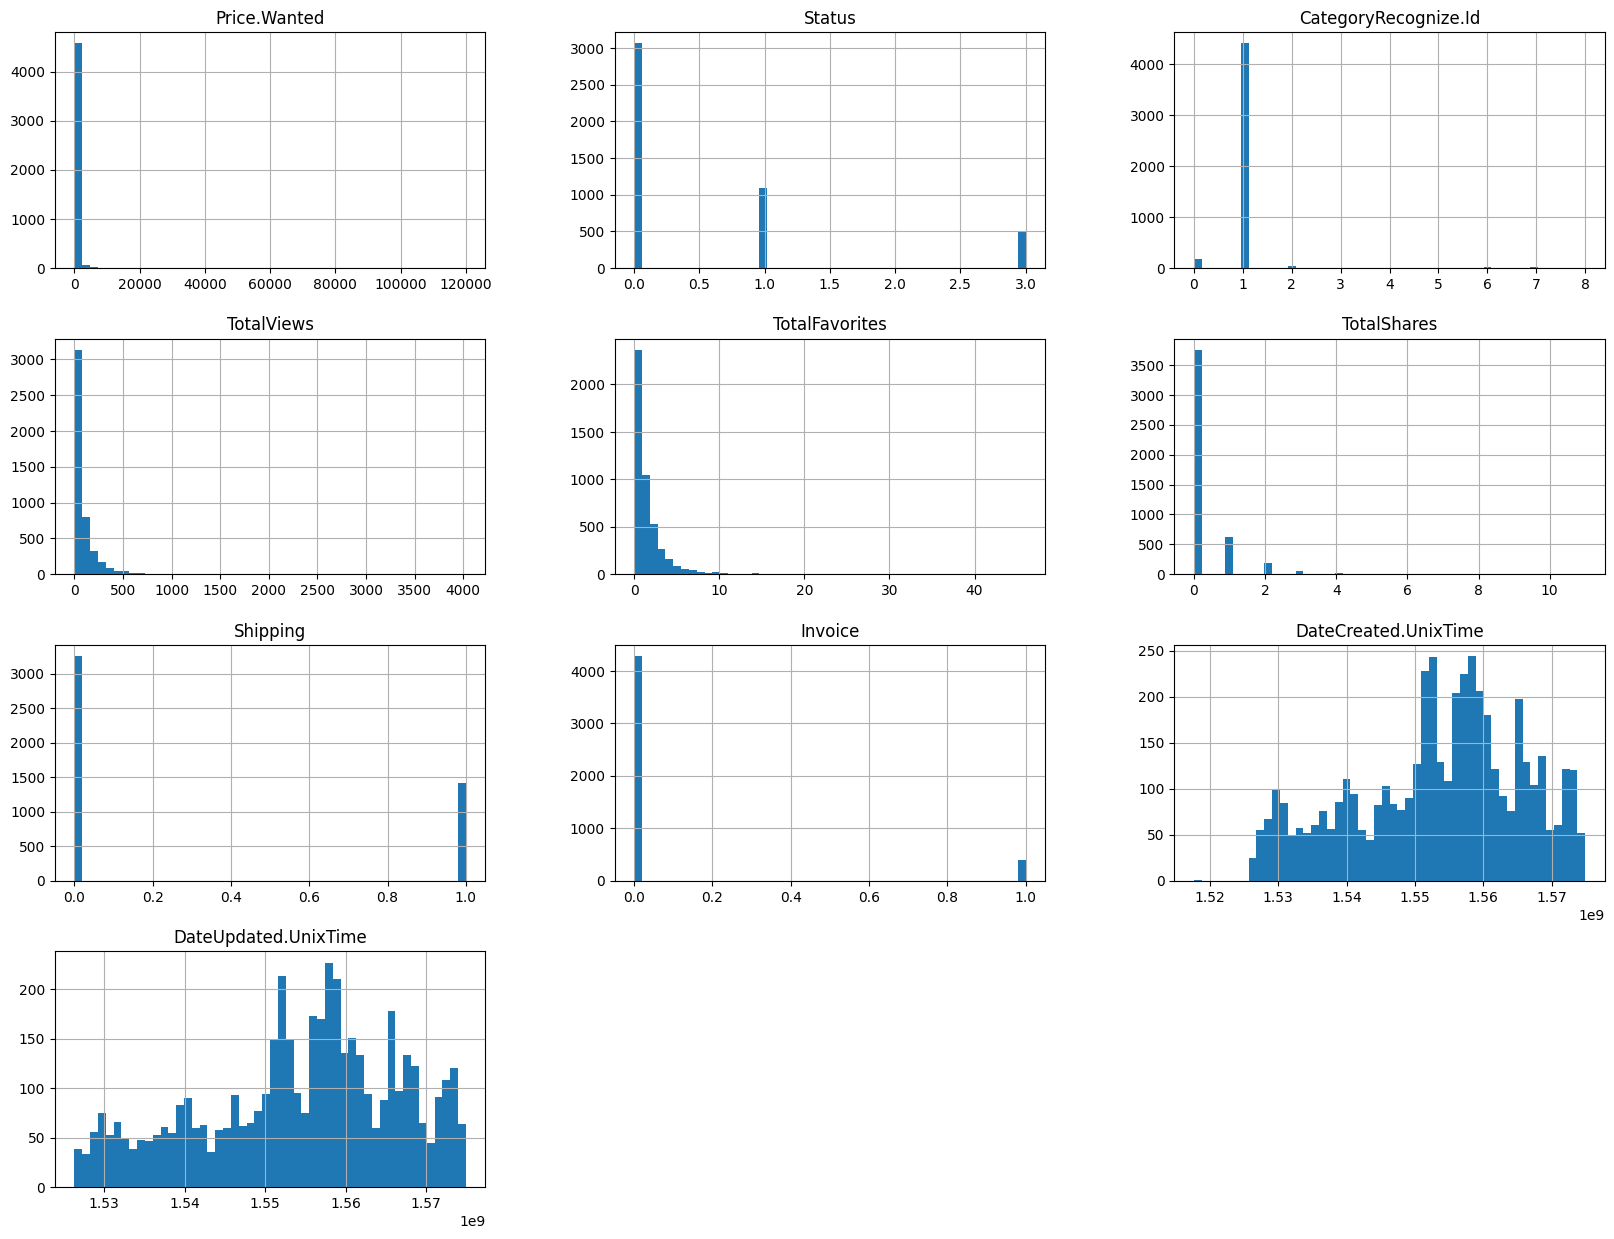

In [294]:
data_only_A.hist(bins=50, figsize=(20,15))

We don't see anything special, maybe it's just a name or it indicates that the description is empty. we will remove the @id and
Member.Id parameters.

In [295]:
dataset_df = dataset_df.drop(["@id", "Member.Id"], axis=1)

In [296]:
dataset_df.head()

,Title,TitleSource,Description,Price.Wanted,Tags,Images,Status,Category.Name,CategoryRecognize.Id,CategoryRecognize.Name,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,Name,DateCreated.UnixTime,DateUpdated.UnixTime
0,משקפי שמש,אביזרים,חדשות,25,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...","[{""DominantColor"":""614233"",""Height"":2016,""Url""...",1,אופנה ואביזרים,1,אופנה ואביזרים,0,0,0,0,0,Accessories,1503857975,1503858005
1,מפה,סֵמֶל,180X220,15,"[{""Confidence"":51.181251525878906,""Id"":""tags-3...","[{""DominantColor"":""BD0F0E"",""Height"":640,""Url"":...",1,אופנה ואביזרים,1,אופנה ואביזרים,0,0,0,0,0,Emblem,1503917224,1503917264
2,סוללה לאופניים 36,לַיְלָה,מחיר בריצפה. לבוא לקחת עד מחר \r\n,150,"[{""Confidence"":53.291530609130859,""Id"":""tags-3...","[{""DominantColor"":""040401"",""Height"":320,""Url"":...",3,אופנה ואביזרים,1,אופנה ואביזרים,6,0,0,0,0,Night,1505264980,1505625084
3,תיק לנערות.,תיק,לקנות כמות נייד 0543973423 אייל,35,"[{""Confidence"":56.021137237548835,""Id"":""tags-3...","[{""DominantColor"":""A57B26"",""Height"":414.0,""Url...",1,אופנה ואביזרים,1,אופנה ואביזרים,14,0,3,1,1,NaN,1507127135,1507899785
4,שרשרת זהב איטלקי 14 קראט,אביזרים,זהב איטלקי 14 קראט חתום .\r\nיוצר בעבודת יד מי...,2800,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...","[{""DominantColor"":""4C3C2C"",""Height"":4608.0,""Ur...",3,אופנה ואביזרים,1,אופנה ואביזרים,31,0,0,0,0,Accessories,1505492279,1507422015


We looked at the Images json strings and we found out the structure is this: Dominant color, height, url, width<br>
We don't think that there is a connection between the image and the products. maybe if we can do process the images and run an algorithm that gets an image and can tell us the brand or some features of the product we could have used it. but we don't know how to implement those algorithms in this time of the course so we will remove this parameter.

In [297]:
dataset_df = dataset_df.drop(["Images"], axis=1)

by looking at the tags. we think that there is a classification algorithm with confidence that categorize the products by their image and tag them. we can see in the json format a tag id and tag name and confidence which is probably between 0 to 100. maybe we can extract related data from that. by investigating more the data we saw that in the tags there is a connection in the names with the Name category. So an option is for the Nan names to fill them with the tag with the most confidence. another option is to change all of the names according to this.


We looked more at the data and we saw that there are 2 categories: Category.Name and CategoryRecognize.Name

In [298]:
dataset_df["CategoryRecognize.Name"].value_counts()

CategoryRecognize.Name
אופנה                  5823
אופנה ואביזרים          502
טכנולוגיה               221
לבית                     72
אחר                      23
אלקטרוניקה ומחשבים       17
רכב וגלגלים              15
גלגלים                   15
בית, עסק וגן             13
מכוניות, ודו גלגלים      11
ילדים                     1
רכב                       1
כלי נגינה                 1
Name: count, dtype: int64

In [299]:
dataset_df["Category.Name"].value_counts()

Category.Name
אופנה             6222
אופנה ואביזרים    1152
Name: count, dtype: int64

we can a see a deference between those columns. maybe by the name the recognize is by the tags and confidence that talk about.

In [300]:
dataset_df.loc[dataset_df["CategoryRecognize.Name"] == "טכנולוגיה"]

,Title,TitleSource,Description,Price.Wanted,Tags,Status,Category.Name,CategoryRecognize.Id,CategoryRecognize.Name,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,Name,DateCreated.UnixTime,DateUpdated.UnixTime
415,ארנק AX,ארנק,מוצר חדש לא נעשה שימוש כלל.,150,"[{""Confidence"":77.15946197509767,""Id"":""tags-29...",1,אופנה,0,טכנולוגיה,24,0,0,0,0,Wallet,1510057919,1510167706
427,כובע Tommy Hilfiger,מַחשֵׁב,חדש עם הטיקט כובע של טומי לבן/כחול -\r\n 1=70₪...,50,"[{""Confidence"":50.659267425537109,""Id"":""tags-3...",1,אופנה,0,טכנולוגיה,97,2,1,0,0,Computer,1509459269,1509837044
450,תחתונים ברזילאיים חדשים עם תוויות !! קיים במיד...,טֶקסט,"תחתונים ברזילאיים נדירים , חדשים עם תוויות , מ...",1,"[{""Confidence"":50.878993988037109,""Id"":""tags-3...",1,אופנה,0,טכנולוגיה,75,0,1,1,0,Text,1511083484,1511085729
478,נעליי אדידס,הַלבָּשָׁה,נעליי אדידס לאישה ולגבר מידה 42 מאשדוד,250,"[{""Confidence"":50.91070556640625,""Id"":""tags-34...",3,אופנה,0,טכנולוגיה,76,0,1,0,0,Clothing,1513596835,1514387994
516,שעון אופנתי,שָׁעוֹן יָד,שעון חדש עם בטריה חדשה,50,"[{""Confidence"":78.714408874511719,""Id"":""tags-8...",1,אופנה,0,טכנולוגיה,56,1,0,0,0,Wristwatch,1515165884,1516281099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7257,שעון יד . צבע כסף למבוגרים,NaN,כמה אחרונים מהרו לקנות,35,"[{""Id"":null,""Name"":""wristwatch"",""Text"":""שעון י...",3,אופנה,0,טכנולוגיה,316,2,0,1,0,NaN,1556006282,1562330580
7278,ארנק לכסף,NaN,ארנק לכסף כמו חדש,70,"[{""Id"":null,""Name"":""wood"",""Text"":""עץ"",""Languag...",3,אופנה,0,טכנולוגיה,4,0,0,0,0,NaN,1574621718,1574663964
7307,תכשיטים -שרשרת,NaN,המוצר נוח לא משומש,250,"[{""Id"":null,""Name"":""text"",""Text"":""טקסט"",""Langu...",0,אופנה,0,טכנולוגיה,23,0,0,0,0,NaN,1564920762,1564920887
7318,שעון מייקל קורס נדיר!!,NaN,שעון מייקל קורס חדש בקופסא עם אחריות והכל!!,-1,"[{""Id"":null,""Name"":""wristwatch"",""Text"":""שעון י...",0,אופנה,0,טכנולוגיה,87,1,0,0,0,NaN,1551279232,1551279462


We can see that it is not technology and it is probably a classifier algorithm so we will remove this column and the other column has only 2 options

In [301]:
dataset_df.drop(["CategoryRecognize.Name"], axis=1, inplace=True)

In [302]:
dataset_df

,Title,TitleSource,Description,Price.Wanted,Tags,Status,Category.Name,CategoryRecognize.Id,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,Name,DateCreated.UnixTime,DateUpdated.UnixTime
0,משקפי שמש,אביזרים,חדשות,25,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...",1,אופנה ואביזרים,1,0,0,0,0,0,Accessories,1503857975,1503858005
1,מפה,סֵמֶל,180X220,15,"[{""Confidence"":51.181251525878906,""Id"":""tags-3...",1,אופנה ואביזרים,1,0,0,0,0,0,Emblem,1503917224,1503917264
2,סוללה לאופניים 36,לַיְלָה,מחיר בריצפה. לבוא לקחת עד מחר \r\n,150,"[{""Confidence"":53.291530609130859,""Id"":""tags-3...",3,אופנה ואביזרים,1,6,0,0,0,0,Night,1505264980,1505625084
3,תיק לנערות.,תיק,לקנות כמות נייד 0543973423 אייל,35,"[{""Confidence"":56.021137237548835,""Id"":""tags-3...",1,אופנה ואביזרים,1,14,0,3,1,1,NaN,1507127135,1507899785
4,שרשרת זהב איטלקי 14 קראט,אביזרים,זהב איטלקי 14 קראט חתום .\r\nיוצר בעבודת יד מי...,2800,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...",3,אופנה ואביזרים,1,31,0,0,0,0,Accessories,1505492279,1507422015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,צמיד ספורט כושר דגם M.A.C 2019,NaN,חדש באריזה צבע שחור. כחול. אדום.,80,"[{""Id"":null,""Name"":""wristwatch"",""Text"":""שעון י...",0,אופנה,1,9,0,1,1,0,NaN,1555511767,1555632137
7370,nike air vapromax 3 מקורי,NaN,nike air vapromax 3 מקורי נקנה לפני שבוע מידה ...,-1,"[{""Id"":null,""Name"":""apparel"",""Text"":""הלבשה"",""L...",0,אופנה,1,154,0,0,0,0,NaN,1570361321,1570361324
7371,נעלי פקקים מקצועיות מידה 7.5 אמריקאי(40.6),NaN,מצויינות מאדידס ארהב ננעלו פעמים בודדות,100,"[{""Id"":null,""Name"":""clothing"",""Text"":""הַלבָּשׁ...",0,אופנה,1,1111,2,1,1,0,NaN,1529052233,1574676536
7372,רחוב אנילביץ 35 בת ים,NaN,אבקות חלבון,200,"[{""Id"":null,""Name"":""clothing"",""Text"":""בגדים"",""...",0,אופנה,1,1,0,0,0,0,NaN,1574918346,1574918351


**funny note** we looked at the number of Eyal in line 4 and we searched online this number. we find out that it's a business!!!!!!! another indicator is that in the description he wrote לקנות כמות !
by looking at eyal's data, we can see that he has invoice and shipping so maybe if we will do a decision tree those parameters will have higher significance

In [303]:
dataset_df.loc[dataset_df["DateCreated.UnixTime"] -dataset_df["DateUpdated.UnixTime"]  <0]

,Title,TitleSource,Description,Price.Wanted,Tags,Status,Category.Name,CategoryRecognize.Id,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,Name,DateCreated.UnixTime,DateUpdated.UnixTime
0,משקפי שמש,אביזרים,חדשות,25,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...",1,אופנה ואביזרים,1,0,0,0,0,0,Accessories,1503857975,1503858005
1,מפה,סֵמֶל,180X220,15,"[{""Confidence"":51.181251525878906,""Id"":""tags-3...",1,אופנה ואביזרים,1,0,0,0,0,0,Emblem,1503917224,1503917264
2,סוללה לאופניים 36,לַיְלָה,מחיר בריצפה. לבוא לקחת עד מחר \r\n,150,"[{""Confidence"":53.291530609130859,""Id"":""tags-3...",3,אופנה ואביזרים,1,6,0,0,0,0,Night,1505264980,1505625084
3,תיק לנערות.,תיק,לקנות כמות נייד 0543973423 אייל,35,"[{""Confidence"":56.021137237548835,""Id"":""tags-3...",1,אופנה ואביזרים,1,14,0,3,1,1,NaN,1507127135,1507899785
4,שרשרת זהב איטלקי 14 קראט,אביזרים,זהב איטלקי 14 קראט חתום .\r\nיוצר בעבודת יד מי...,2800,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...",3,אופנה ואביזרים,1,31,0,0,0,0,Accessories,1505492279,1507422015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,צמיד ספורט כושר דגם M.A.C 2019,NaN,חדש באריזה צבע שחור. כחול. אדום.,80,"[{""Id"":null,""Name"":""wristwatch"",""Text"":""שעון י...",0,אופנה,1,9,0,1,1,0,NaN,1555511767,1555632137
7370,nike air vapromax 3 מקורי,NaN,nike air vapromax 3 מקורי נקנה לפני שבוע מידה ...,-1,"[{""Id"":null,""Name"":""apparel"",""Text"":""הלבשה"",""L...",0,אופנה,1,154,0,0,0,0,NaN,1570361321,1570361324
7371,נעלי פקקים מקצועיות מידה 7.5 אמריקאי(40.6),NaN,מצויינות מאדידס ארהב ננעלו פעמים בודדות,100,"[{""Id"":null,""Name"":""clothing"",""Text"":""הַלבָּשׁ...",0,אופנה,1,1111,2,1,1,0,NaN,1529052233,1574676536
7372,רחוב אנילביץ 35 בת ים,NaN,אבקות חלבון,200,"[{""Id"":null,""Name"":""clothing"",""Text"":""בגדים"",""...",0,אופנה,1,1,0,0,0,0,NaN,1574918346,1574918351


it's almost all the lines so we concluded that all people that created a product didn't change it

In [304]:
dataset_df.drop(["DateUpdated.UnixTime", "DateCreated.UnixTime"], axis = 1, inplace=True)

In [305]:
dataset_df.head()

,Title,TitleSource,Description,Price.Wanted,Tags,Status,Category.Name,CategoryRecognize.Id,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,Name
0,משקפי שמש,אביזרים,חדשות,25,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...",1,אופנה ואביזרים,1,0,0,0,0,0,Accessories
1,מפה,סֵמֶל,180X220,15,"[{""Confidence"":51.181251525878906,""Id"":""tags-3...",1,אופנה ואביזרים,1,0,0,0,0,0,Emblem
2,סוללה לאופניים 36,לַיְלָה,מחיר בריצפה. לבוא לקחת עד מחר \r\n,150,"[{""Confidence"":53.291530609130859,""Id"":""tags-3...",3,אופנה ואביזרים,1,6,0,0,0,0,Night
3,תיק לנערות.,תיק,לקנות כמות נייד 0543973423 אייל,35,"[{""Confidence"":56.021137237548835,""Id"":""tags-3...",1,אופנה ואביזרים,1,14,0,3,1,1,NaN
4,שרשרת זהב איטלקי 14 קראט,אביזרים,זהב איטלקי 14 קראט חתום .\r\nיוצר בעבודת יד מי...,2800,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...",3,אופנה ואביזרים,1,31,0,0,0,0,Accessories


In [306]:
dataset_df.loc[(dataset_df["Invoice"] == 1) & (dataset_df["TotalViews"] > 50)]


,Title,TitleSource,Description,Price.Wanted,Tags,Status,Category.Name,CategoryRecognize.Id,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,Name
21,חדש אדידס 2018,כרית,חדש,250,"[{""Confidence"":65.532012939453125,""Id"":""tags-1...",1,אופנה,1,115,0,0,0,1,NaN
37,תליון כסף 925,תליון כסף 925,שרשרת כסף 925 באורך 45 סמ עם תליון כסף,200,[],3,אופנה ואביזרים,8,174,5,0,1,1,NaN
83,תיק גב,חתיכת מטען,תיק כתף גבר,150,"[{""Confidence"":56.021137237548835,""Id"":""tags-3...",1,אופנה ואביזרים,8,78,0,0,1,1,NaN
88,מטען,מטען,מזוודת עורך דין 4 גלגלים גם מיקום למחשב בא בדג...,300,[],1,אופנה ואביזרים,1,79,0,0,0,1,Luggage
102,טבעת כסף 925,גָבִישׁ,טבעת כסף 925 משובצת בזירקוניות. טבעת פתוחה ומת...,150,"[{""Confidence"":50.5678825378418,""Id"":""tags-375...",1,אופנה ואביזרים,8,82,0,0,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7191,אקס בוקס וואן s חדש בקופסה לפרטים 054593...,NaN,כולל פיפא 2019,1200,"[{""Id"":null,""Name"":""human"",""Text"":""בן אנוש"",""L...",0,אופנה,1,127,1,0,0,1,NaN
7228,החליפה מידה M,NaN,"חליפה חדשה לא נלבשה , מוכרת עקב בעיה במידה",600,"[{""Id"":null,""Name"":""apparel"",""Text"":""הלבשה"",""L...",0,אופנה,1,74,2,0,0,1,NaN
7244,Yeezy Boost 350 V2 Static size 44,NaN,חדש לא ננעל מעולם. נקנה מפקטורי 54,1200,"[{""Id"":null,""Name"":""clothing"",""Text"":""בגדים"",""...",0,אופנה,1,377,4,0,1,1,NaN
7322,סט תכשיטי זהב 14kמשובצים יהלומים.,NaN,תכשיטי זהב 14k משובצים יהלומים באיכות טובה .,2150,"[{""Id"":null,""Name"":""jewelry"",""Text"":""תכשיט"",""L...",0,אופנה,1,61,2,0,1,1,NaN


Now we will try running logistic regression to find if we enter the price and the shipping we get the invoice. 

In [307]:
from sklearn.model_selection import train_test_split
dataLogistic = dataset_df[["Price.Wanted", "Invoice", "Shipping"]]
y  = dataLogistic.pop("Invoice")
dataLogistic

,Price.Wanted,Shipping
0,25,0
1,15,0
2,150,0
3,35,1
4,2800,0
...,...,...
7369,80,1
7370,-1,0
7371,100,1
7372,200,0


In [308]:
X_train, X_test, y_train, y_test = train_test_split(dataLogistic, y, test_size=0.2, random_state=42)
y_train.value_counts()

Invoice
0    5348
1     551
Name: count, dtype: int64

In [309]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [310]:
#evaluate the model
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1338,    0],
       [ 135,    2]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

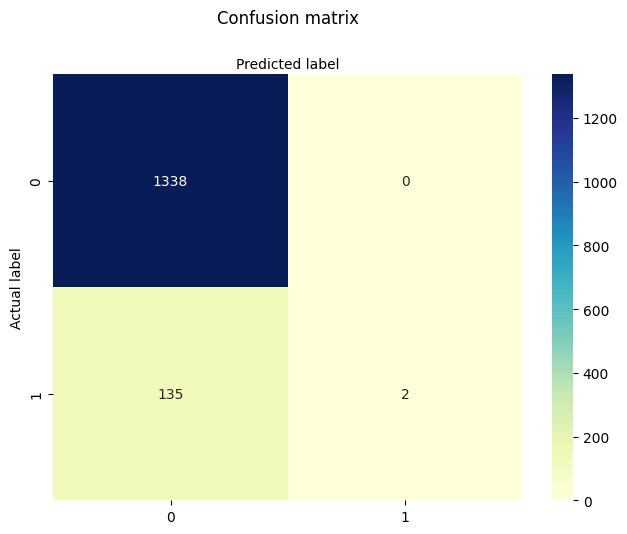

In [311]:
#visualizing code for confusion matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

We can't predict the Invoice 1 and the model thought all are 0.
Let's run another model like decision tree.

In [312]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train a Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [313]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1321,   17],
       [ 125,   12]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

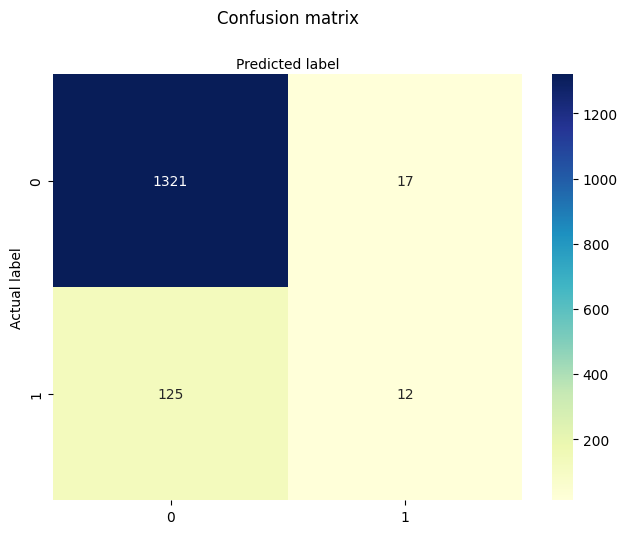

In [314]:
#visualizing code for confusion matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Unfortunately, we got almost the same result. So maybe there is no connection. 

In [315]:
dataset_df[['Invoice','Price.Wanted']].groupby(['Invoice'], as_index=True).mean()

,Price.Wanted
Invoice,
0,376.922375
1,1311.090116


In [316]:
dataset_df[['Shipping','Price.Wanted']].groupby(['Shipping'], as_index=True).mean()

,Price.Wanted
Shipping,
0,378.972835
1,711.205400


We can see that the price is not affected much if there is no invoice and there is no shipping.

In [317]:
dataset_df[["Invoice", "Shipping"]].sum()

Invoice      688
Shipping    1889
dtype: int64

## Now we would like to check if we choose 300 samples from invoice 0 and 1 if the logistic regression will work.

In [318]:
train_df_invoice_0 = dataset_df.loc[dataset_df["Invoice"] == 0].sample(n=600)
train_df_invoice_1 = dataset_df.loc[dataset_df["Invoice"] == 1].sample(n=600)
# Combine the dataframes
combined_df = pd.concat([train_df_invoice_0, train_df_invoice_1])

# Shuffle the combined dataframe
shuffled_df = combined_df.sample(frac=1).reset_index(drop=True)

shuffled_df

,Title,TitleSource,Description,Price.Wanted,Tags,Status,Category.Name,CategoryRecognize.Id,TotalViews,TotalFavorites,TotalShares,Shipping,Invoice,Name
0,מכונת תספורת רמנגטון,מכשירי חשמל,מכונת תספורת רמנגטון 50₪,50,"[{""Confidence"":51.523502349853523,""Id"":""tags-1...",3,אופנה,1,208,0,0,0,0,Electronics
1,ג׳קט מושלם מh&m מידה s,NaN,NaN,40,"[{""Confidence"":91.356369018554688,""Id"":null,""L...",0,אופנה,1,47,0,0,0,0,NaN
2,נעליים של גולדן גוס כל המידות.,הַלבָּשָׁה,"נעלי גולדן גוס, איכותיות. כל המידות, המון דגמי...",450,"[{""Id"":""tags-8391"",""Name"":""clothing"",""Text"":""ה...",0,אופנה,1,127,2,0,1,1,Clothing
3,ורסצ'ה צמיד,NaN,0526703859 לפרטים,299,"[{""Id"":null,""Name"":""ashtray"",""Text"":""מאפרה"",""L...",0,אופנה,1,85,2,0,1,0,NaN
4,למכירה נעלי עקב מידות 37 כל זוג 60 שקלים.,הַלבָּשָׁה,למכירה נעלי עקב מידה 37 כל זוג 60 שקלים.,60,"[{""Confidence"":60.877590179443359,""Id"":""tags-1...",0,אופנה,1,197,6,2,0,0,Clothing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,קרם ידיים,גָבִיעַ,חדש,10,"[{""Confidence"":88.918952941894531,""Id"":""tags-8...",1,אופנה,1,0,0,2,0,0,Cup
1196,תיקים לערב,NaN,5 תיקי ערב יפים כל מיני דוגמאות וצבעים כמו חדשים,20,"[{""Id"":null,""Name"":""accessories"",""Text"":""אביזר...",0,אופנה,1,39,1,1,0,0,NaN
1197,מגוון רחב של תכשיטים,NaN,NaN,100,"[{""Id"":null,""Name"":""bottle"",""Text"":""בקבוק"",""La...",0,אופנה,1,4,0,0,0,0,NaN
1198,Nike classic Cortez,NaN,"נייק קלאסיק קורטז , חדשות מידה 39 , ננעלו פעם ...",200,"[{""Id"":null,""Name"":""apparel"",""Text"":""הלבשה"",""L...",0,אופנה,1,141,2,0,0,0,NaN


In [319]:
dataset_df["Invoice"].unique()

array([0, 1], dtype=int64)

after we chose the training data let's try it on the algorithm

In [320]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)
for train_index, test_index in split.split(shuffled_df, shuffled_df["Invoice"]):
    strat_train_set = shuffled_df.loc[train_index]
    strat_test_set = shuffled_df.loc[test_index]

In [321]:
strat_train_set["Invoice"]


594     1
842     1
531     0
31      1
139     0
       ..
753     0
254     0
1143    1
1025    1
603     1
Name: Invoice, Length: 960, dtype: int64

In [322]:
logreg = LogisticRegression(random_state=42)

logreg.fit(strat_train_set[["Price.Wanted", "Shipping"]], strat_train_set["Invoice"])

y_pred = logreg.predict(strat_test_set[["Price.Wanted", "Shipping"]])

In [323]:
cnf_matrix = metrics.confusion_matrix(strat_test_set["Invoice"], y_pred)
cnf_matrix

array([[96, 24],
       [47, 73]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

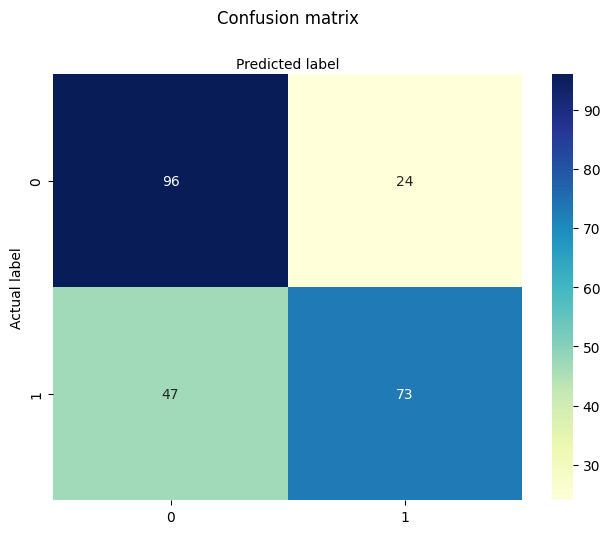

In [324]:
#visualizing code for confusion matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [325]:
sum_first_diagonal = sum(cnf_matrix[i][i] for i in range(len(cnf_matrix[0])))
total = len(strat_test_set)
print("The percentage of correct in the model is : " + str(100*sum_first_diagonal/total)+"%")

The percentage of correct in the model is : 70.41666666666667%


Wow, Now we got an amazing result. we got 70 percent right. now let's try it on a decision tree.

In [326]:
# Initialize and train a Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(strat_train_set[["Price.Wanted", "Shipping"]], strat_train_set["Invoice"])

# Make predictions on the test data
y_pred = model.predict(strat_test_set[["Price.Wanted", "Shipping"]])

Text(0.5, 427.9555555555555, 'Predicted label')

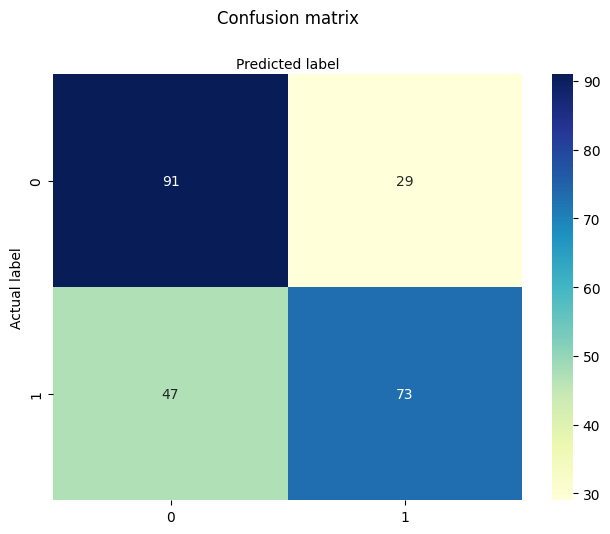

In [327]:
cnf_matrix = metrics.confusion_matrix(strat_test_set["Invoice"], y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [328]:
sum_first_diagonal = sum(cnf_matrix[i][i] for i in range(len(cnf_matrix[0])))
total = len(strat_test_set)
print("The percentage of correct in the model is : " + str(100*sum_first_diagonal/total)+"%")

The percentage of correct in the model is : 68.33333333333333%


## we got better results with the logistic regression.
We found a pretty strong connection between price and shipping to invoice. so with that we can determine which is a business.<br>
in other words, maybe if the Invoice got 1 it is a business or not. 

**Note🔑:** when we are using that random selection there is a probability that in whole dataset the connection work therefore, we need to check it

In [ ]:
dataset_df